In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get a list of all Excel files in the directory
excel_files = [f for f in os.listdir('Recipes/') if f.endswith('.xlsx')]

# Specify your new directory
new_dir = './csv_files/'

# Create the new directory if it doesn't exist
os.makedirs(new_dir, exist_ok=True)
for excel_file in excel_files:
    # Extract the year from the file name using regular expressions
    year_match = re.search(r'\d{4}', excel_file)  # Looks for four digits in a row
    year = year_match.group() if year_match else 'unknown'

    # Load spreadsheet
    xl = pd.ExcelFile(os.path.join('Recipes/', excel_file), engine='openpyxl')

    # Load a sheet into a DataFrame by its name
    for sheet_name in xl.sheet_names:
        df = xl.parse(sheet_name)
        df = df.iloc[:, :11]

        # Write DataFrame to a CSV file with year prefix in the specified directory
        df.to_csv(new_dir + f'{year}_{sheet_name}.csv', index=False)

# Get a list of all CSV files in the new directory
csv_files = [f for f in os.listdir(new_dir) if f.endswith('.csv')]

# Read each CSV file and store the data in a dictionary
data = {}
for csv_file in csv_files:
    data[csv_file] = pd.read_csv(new_dir + csv_file)

In [3]:
# Get a list of all CSV files in the subdirectory
csv_files = [f for f in os.listdir('csv_files/') if f.endswith('.csv')]

# Check if the 'processed_csv' directory exists, if not create it
if not os.path.exists('processed_csv'):
    os.makedirs('processed_csv')

data = {}
for csv_file in csv_files:
    df = pd.read_csv('csv_files/' + csv_file, header=None)
    df.columns = ['Colors', 'Flowers', 'StemPrice', 'SQty', 'SPrice', 'DQty','DPrice','PQty','PPrice','EQty','EPrice']
    df = df.iloc[4:16]

    # Save this DataFrame to a new CSV file in the 'processed_csv' subdirectory
    df.to_csv('processed_csv/' + csv_file[:-4] + '_processed.csv', index=False)

    data[csv_file] = df


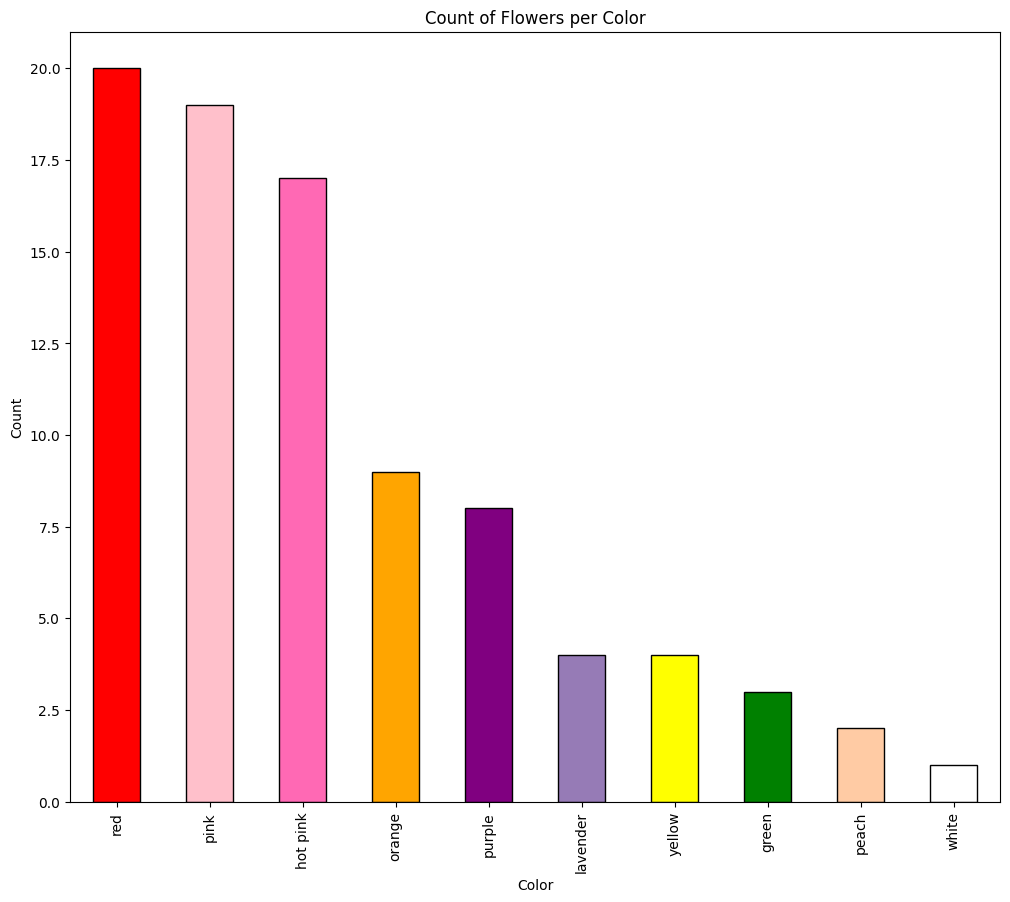

In [4]:
# Get a list of all processed CSV files in the processed_csvs directory
csv_files = [f for f in os.listdir('processed_csv') if f.endswith('.csv')]

data = {}
for csv_file in csv_files:
    df = pd.read_csv(f'processed_csv/{csv_file}')
    df = df.iloc[0:9]
    data[csv_file] = df

# Concatenate all dataframes in the dictionary into a single dataframe
# Create a new column 'Arrangement' which is the key in the dictionary
all_data = pd.concat([df.assign(Arrangement=os.path.splitext(name)[0]) for name, df in data.items()])

# Convert the color names to lowercase
all_data['Colors'] = all_data['Colors'].str.lower().str.strip()

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Count the number of flowers per color
color_counts = all_data['Colors'].value_counts()
color_names = color_counts.index

# Plot the bar chart with custom colors and outline
plt.figure(figsize=(12,10))  # Move this before the plot
color_counts.plot(kind='bar', color=[custom_colors.get(c, 'gray') for c in color_names], edgecolor='black')
plt.title('Count of Flowers per Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.savefig('Count of Flowers per Color')
plt.show()

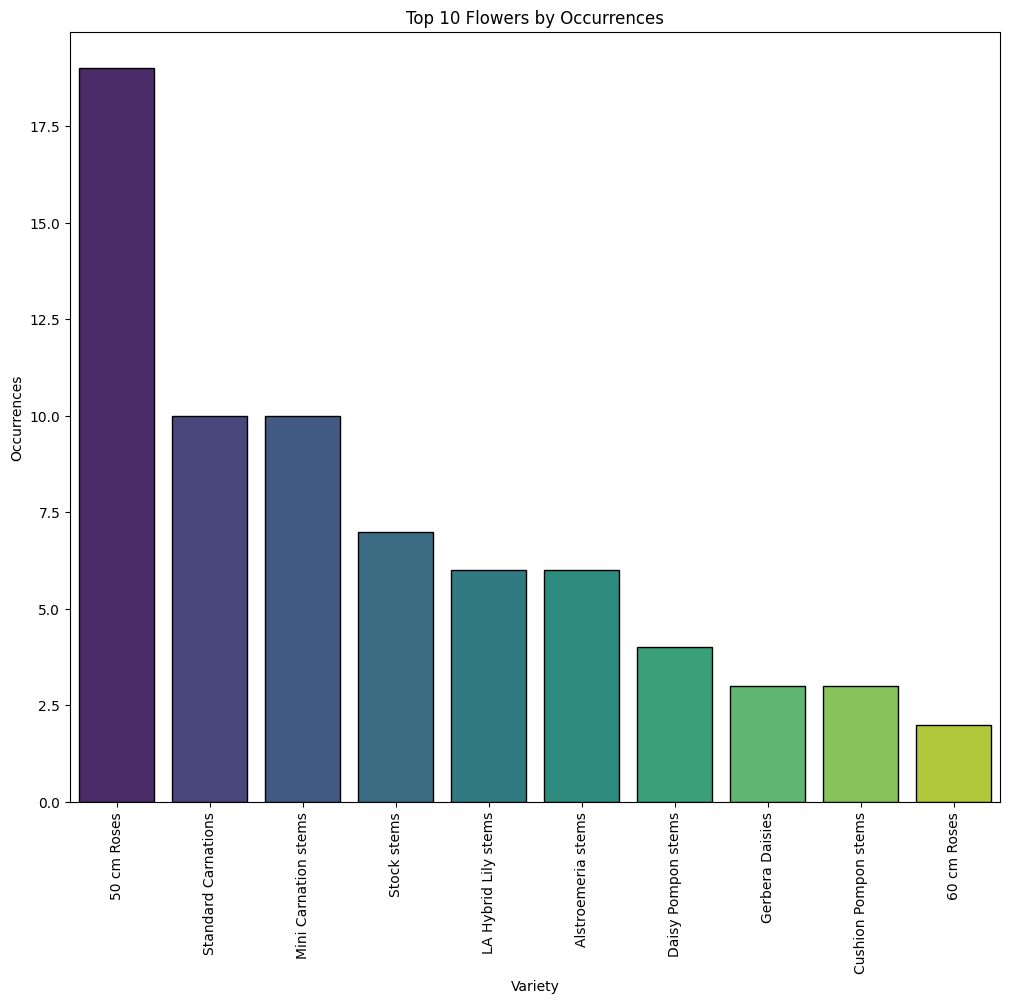

In [5]:
# Remove rows where 'Colors' is NaN
all_data = all_data[all_data['Colors'].notna()]

# Count the occurrences of each flower variety
variety_counts = all_data['Flowers'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12,10))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Flowers by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.savefig('Top 10 Flowers by Occurrences')

plt.show()


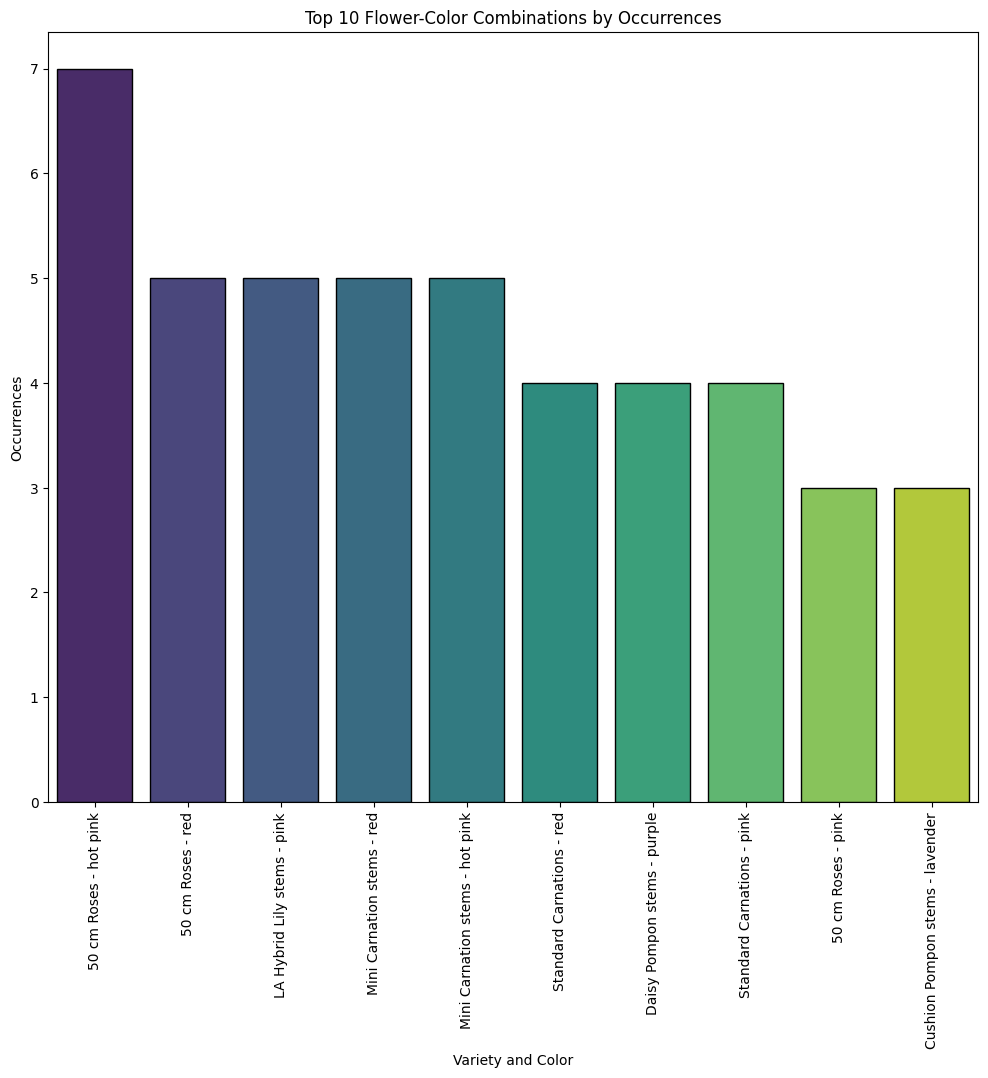

In [6]:
# Remove rows where 'Colors' is NaN
all_data = all_data[all_data['Colors'].notna()]

# Count the occurrences of each unique combination of 'Flowers' and 'Colors'
variety_color_counts = all_data.groupby(['Flowers', 'Colors']).size()

# Select the top 10 combinations
top_varieties_colors = variety_color_counts.sort_values(ascending=False).head(10)

# Convert the MultiIndex to a single index by joining the levels with a separator
top_varieties_colors.index = top_varieties_colors.index.map(' - '.join)

# Create a bar plot for the top 10 combinations
plt.figure(figsize=(12,10))
sns.barplot(x=top_varieties_colors.index, y=top_varieties_colors.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Flower-Color Combinations by Occurrences')
plt.xlabel('Variety and Color')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.savefig('Top 10 Flower-Color Combinations by Occurrences')

plt.show()

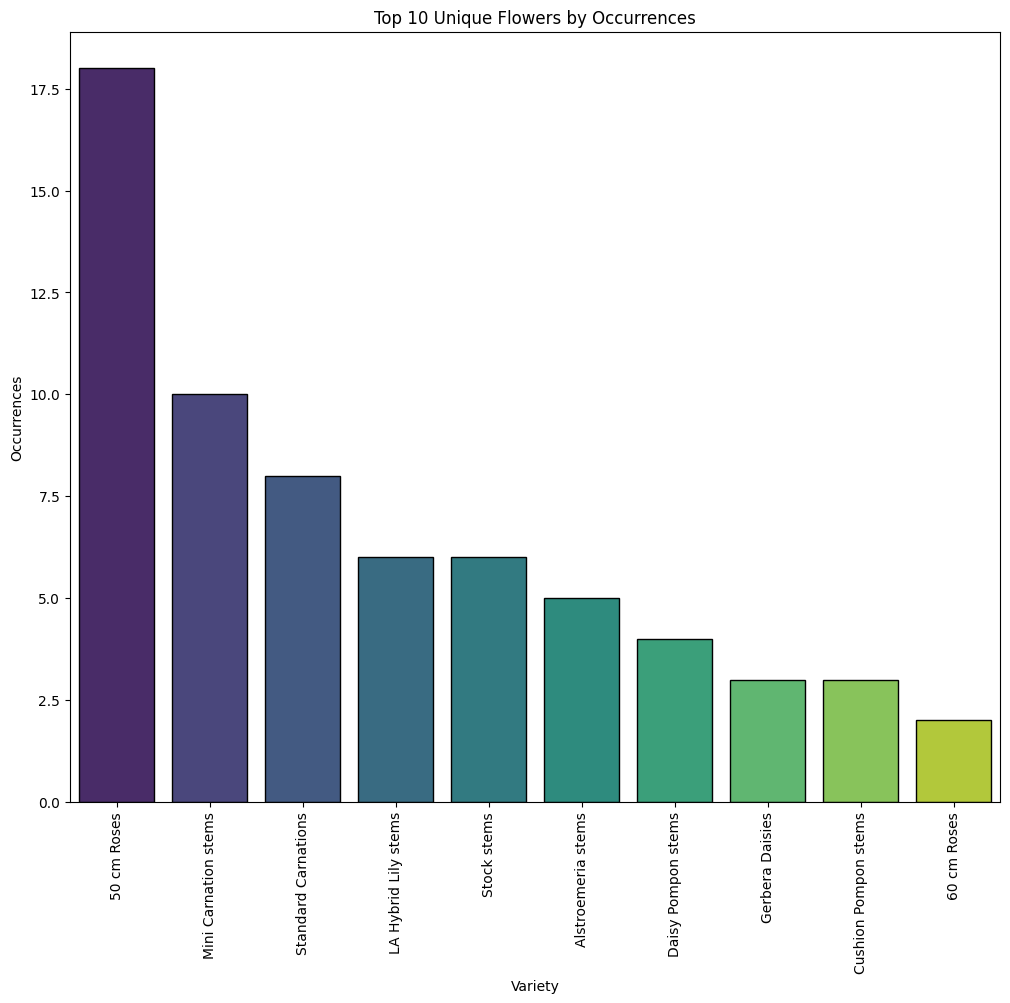

In [7]:
# Drop duplicates based on 'Arrangement' and 'Flowers'
all_data_unique_flowers = all_data.drop_duplicates(subset=['Arrangement', 'Flowers'])

# Count the occurrences of each 'Flowers' type
variety_counts = all_data_unique_flowers['Flowers'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12,10))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Unique Flowers by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.savefig('Top 10 Unique Flowers by Occurrences')

plt.show()


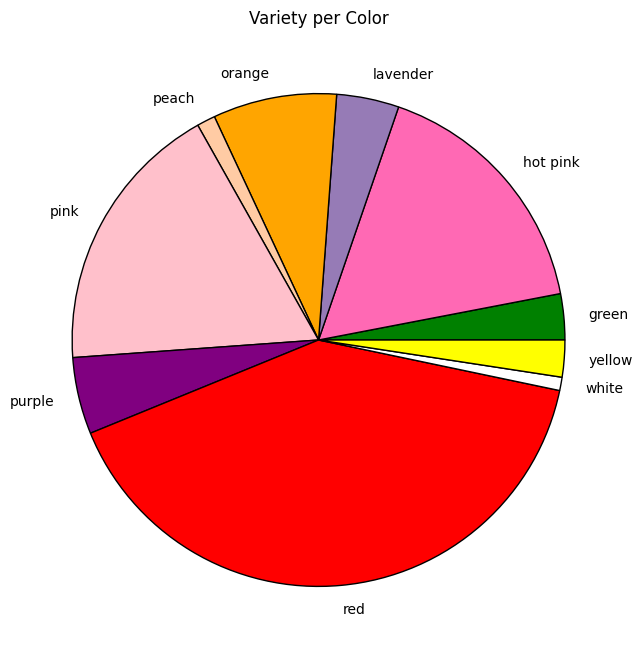

In [8]:
all_data['Colors'] = all_data['Colors'].str.lower()
all_data['Colors'] = all_data['Colors'].str.strip()
# Remove rows with NaN values in the 'Colors' column
all_data = all_data[all_data['Colors'].notna()]

# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate the total volume for each color
color_volume = all_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(10, 8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors, wedgeprops = {"edgecolor" : "black", 'linewidth': 1,'antialiased': True})


plt.title('Variety per Color')

# Position the legend outside the chart area
plt.savefig('Variety per Color Border')
plt.show()


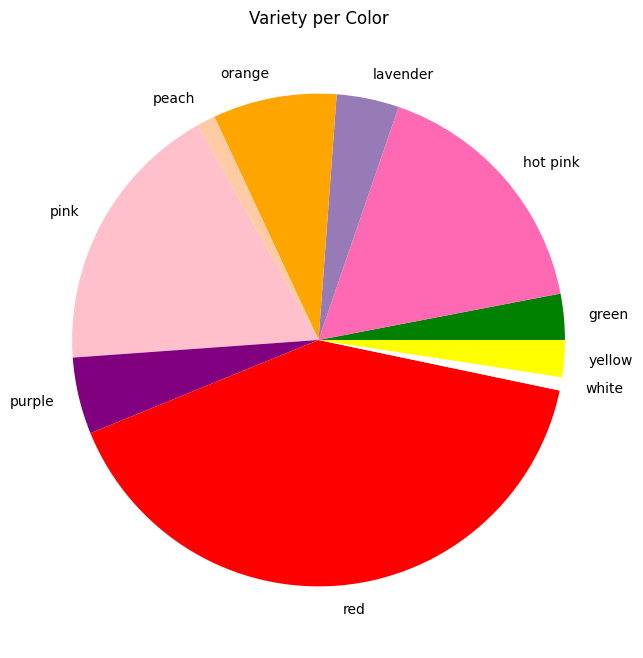

In [9]:
# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate the total volume for each color
color_volume = all_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(10, 8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)


plt.title('Variety per Color')

# Position the legend outside the chart area
plt.savefig('Variety per Color Borderless')
plt.show()


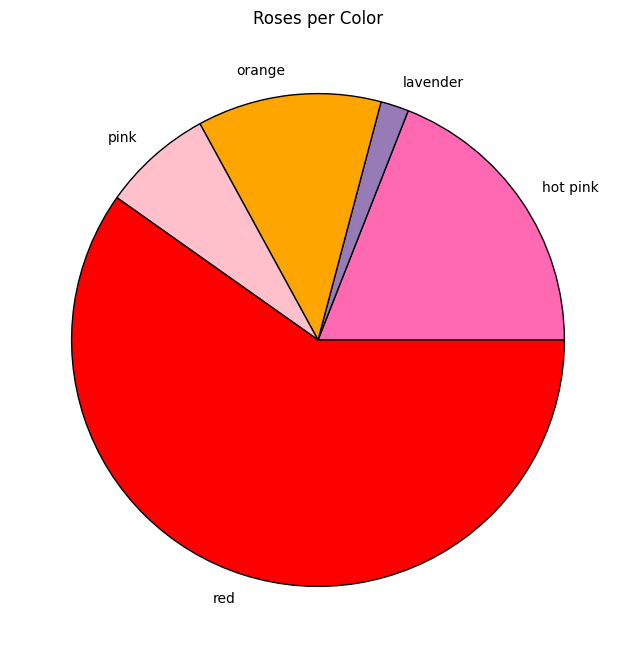

In [10]:
all_data['Flowers'] = all_data['Flowers'].str.lower()
all_data['Flowers'] = all_data['Flowers'].str.strip()
# Remove rows with NaN values in the 'Flowers' column
all_data = all_data[all_data['Flowers'].notna()]
# Filter rows for roses
roses_data = all_data[all_data['Flowers'].str.contains('rose', case=False)]

# Calculate the total volume for each color
color_volume = roses_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(10, 8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors, 
                         wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True})

plt.title('Roses per Color')

# Position the legend outside the chart area
plt.savefig('Roses per Color Border')
plt.show()

In [11]:
# Remove the filter to include all arrangements
all_arrangements = all_data

# Drop duplicates to ensure each flower type is counted only once per arrangement
all_unique_flowers = all_arrangements.drop_duplicates(subset=['Arrangement', 'Flowers'])

# Count the occurrences of each color and flower type
color_counts = all_arrangements['Colors'].value_counts()
flower_counts = all_unique_flowers['Flowers'].value_counts()

print("Most common colors among all arrangements:")
print(color_counts)
print("\nMost common flower types among all arrangements:")
print(flower_counts)


Most common colors among all arrangements:
Colors
red         20
pink        19
hot pink    17
orange       9
purple       8
lavender     4
yellow       4
green        3
peach        2
white        1
Name: count, dtype: int64

Most common flower types among all arrangements:
Flowers
50 cm roses                18
mini carnation stems       10
standard carnations         8
la hybrid lily stems        6
stock stems                 6
alstroemeria stems          5
daisy pompon stems          4
gerbera daisies             3
cushion pompon stems        3
60 cm roses                 2
button pompon stems         2
sunflowers                  2
la lily stems               2
double lisianthus stems     2
snapdragon stems            2
spray rose stems            2
hypericum berry stems       2
waxflower stems             1
fuji mums                   1
hydrangea blooms            1
Name: count, dtype: int64


In [12]:
# Load the data for each year
df_2022 = pd.read_excel('Top10/Top 10 22 vs 23 VDay.xlsx', sheet_name='2022') # Replace with your 2022 sheet name
df_2023 = pd.read_excel('Top10/Top 10 22 vs 23 VDay.xlsx', sheet_name='2023') # Replace with your 2023 sheet name

# Define a function to clean up the data
def clean_data(df):
    df['Gross Order Line Group Amt'] = df['Gross Order Line Group Amt'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    df['AOV'] = df['AOV'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    df['Order Line Group Cnt'] = df['Order Line Group Cnt'].replace({',': ''}, regex=True).astype(int)
    return df

# Clean the data
df_2022 = clean_data(df_2022)
df_2023 = clean_data(df_2023)

In [13]:
def basic_stats(df, year):
    # Basic statistics
    total_order_cnt = df['Order Line Group Cnt'].sum()
    total_order_amt = df['Gross Order Line Group Amt'].sum()
    avg_aov = df['AOV'].mean()

    print(f"Stats for {year}:")
    print(f"Total Order Count: {total_order_cnt}")
    print(f"Total Order Amount: ${total_order_amt}")
    print(f"Average AOV: ${avg_aov}")

    # Highest Gross Order Line Group Amt, Order Line Group Cnt, and AOV
    highest_order_amt_code = df.loc[df['Gross Order Line Group Amt'].idxmax(), 'Featured Product Set Code']
    highest_order_cnt_code = df.loc[df['Order Line Group Cnt'].idxmax(), 'Featured Product Set Code']
    highest_aov_code = df.loc[df['AOV'].idxmax(), 'Featured Product Set Code']

    print(f"Product with Highest Order Amount: {highest_order_amt_code}")
    print(f"Product with Highest Order Count: {highest_order_cnt_code}")
    print(f"Product with Highest AOV: {highest_aov_code}")

basic_stats(df_2022, 2022)
print("---")
basic_stats(df_2023, 2023)


Stats for 2022:
Total Order Count: 117614
Total Order Amount: $12725541.82
Average AOV: $109.03099999999999
Product with Highest Order Amount: B59
Product with Highest Order Count: C5375
Product with Highest AOV: V1R
---
Stats for 2023:
Total Order Count: 92182
Total Order Amount: $9928045.36
Average AOV: $108.175
Product with Highest Order Amount: YPB
Product with Highest Order Count: C5375
Product with Highest AOV: V1R


In [14]:
# The path to the directory where your csv files are stored
directory = 'processed_csv/'

# Initialize an empty list to hold all transactions
transactions = []

# Loop through every file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # check if the file is a CSV
        # Create a dataframe from the csv file
        df = pd.read_csv(directory + filename)

        # Fill NaNs in 'Colors' and 'Flowers' with an empty string
        df['Colors'].fillna('', inplace=True)
        df['Flowers'].fillna('', inplace=True)

        # Merge the 'Colors' and 'Flowers' columns into a single column
        df['Items'] = df.apply(lambda row: row['Colors'] + ' ' + row['Flowers'] if row['Colors'] and row['Flowers'] else row['Colors'] or row['Flowers'], axis=1)

        # Drop rows where 'Items' is empty or whitespace
        df = df[df['Items'].str.strip() != '']

        # Extract the items into a list
        items = df['Items'].tolist()

        # Add this list to the transactions list
        transactions.append(items)

In [15]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# Define the column names for Good, Better, Best, Exquisite
column_names = ["Unnamed: 4", "Unnamed: 6", "Unnamed: 8", "Unnamed: 10"]

# Get a list of all CSV files in the subdirectory
csv_files = [f for f in os.listdir('csv_files/') if f.endswith('.csv')]

# Check if the 'price_csv' directory exists, if not create it
if not os.path.exists('price_csv'):
    os.makedirs('price_csv')

data = {}
for csv_file in csv_files:
    df = pd.read_csv('csv_files/' + csv_file)

    # Select only the columns of interest
    df = df[column_names]
    
    df = df.iloc[1:3]

    # Save this DataFrame to a new CSV file in the 'price_csv' subdirectory
    df.to_csv('price_csv/' + csv_file[:-4] + '_price.csv', index=False)

    data[csv_file] = df

In [16]:
# Specify the directory containing your CSV files
data_directory = 'processed_csv'

# Get a list of all CSV files in the directory
files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.csv')]

dfs = []
for filename in files:
    df = pd.read_csv(filename)
    df = df.iloc[0:9]
    # Extract the year from the filename
    year = re.search(r'\d{4}', filename).group(0)
    df['Year'] = int(year)
    
    dfs.append(df)

# Concatenate all the DataFrames
all_data = pd.concat(dfs, ignore_index=True)

/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/4118973985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.lower()
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/4118973985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.strip()


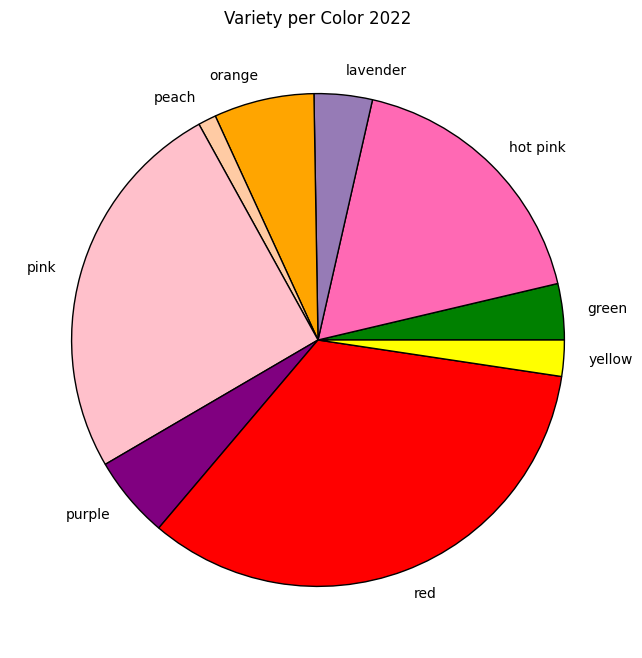

/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/4118973985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.lower()
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/4118973985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.strip()


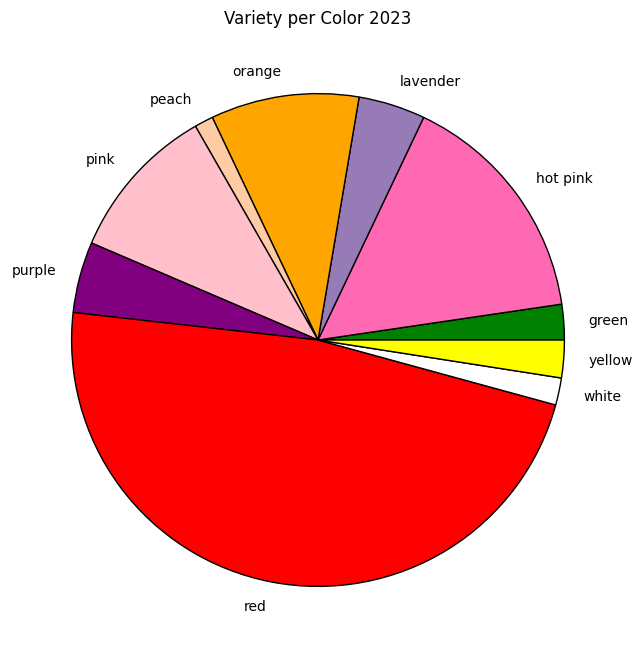

In [17]:
# Split the data based on the year
data_2022 = all_data[all_data['Year'] == 2022]
data_2023 = all_data[all_data['Year'] == 2023]

for data, year in zip([data_2022, data_2023], ['2022', '2023']):
    data['Colors'] = data['Colors'].str.lower()
    data['Colors'] = data['Colors'].str.strip()
    # Remove rows with NaN values in the 'Colors' column
    data = data[data['Colors'].notna()]

    # Convert the quantity columns to numeric
    for col in ['SQty', 'DQty', 'PQty', 'EQty']:
        data.loc[:, col] = pd.to_numeric(data.loc[:, col], errors='coerce')
    # Calculate the total volume for each color
    color_volume = data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

    # Filter out colors with 0 sales volume
    color_volume = color_volume[color_volume != 0]
    # Define the custom colors
    custom_colors = {
        'hot pink': '#FF69B4',
        'orange': '#FFA500',
        'pink': '#FFC0CB',
        'green': '#008000',
        'purple': '#800080',
        'yellow': '#FFFF00',
        'white': '#FFFFFF',
        'peach': '#ffcba4',
        'lavender': '#967bb6',
        'light pink': '#FFB6C1',
        'red': '#FF0000',
        'pale pink': '#FFEFD5',
        'blue': '#8EA5C5',
        'ivory': '#f5f5dc'
    }
    # Create the pie chart with custom colors
    custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
    colors = [custom_colors[color] for color in color_volume.index]

    # Adjust the figure size
    plt.figure(figsize=(10, 8))

    # Create the pie chart with updated colors
    patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors, wedgeprops = {"edgecolor" : "black", 'linewidth': 1,'antialiased': True})

    plt.title(f'Variety per Color {year}')

    # Position the legend outside the chart area
    plt.savefig(f'Variety per Color Borders {year}')
    plt.show()


/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2342545196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.lower()
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2342545196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.strip()


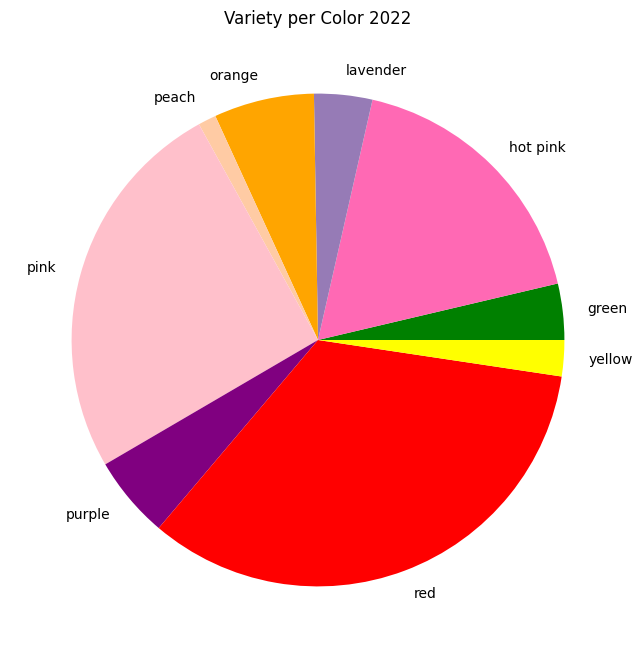

/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2342545196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.lower()
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2342545196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.strip()


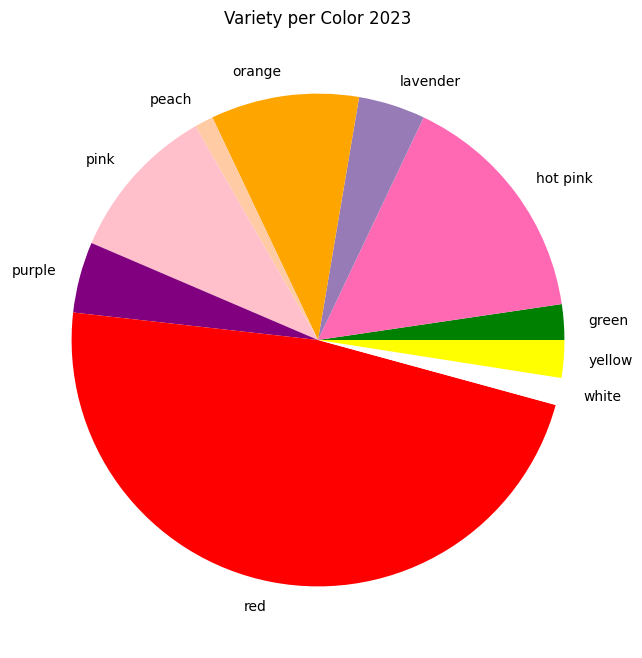

In [18]:
# Split the data based on the year
data_2022 = all_data[all_data['Year'] == 2022]
data_2023 = all_data[all_data['Year'] == 2023]

for data, year in zip([data_2022, data_2023], ['2022', '2023']):
    data['Colors'] = data['Colors'].str.lower()
    data['Colors'] = data['Colors'].str.strip()
    # Remove rows with NaN values in the 'Colors' column
    data = data[data['Colors'].notna()]

    # Convert the quantity columns to numeric
    for col in ['SQty', 'DQty', 'PQty', 'EQty']:
        data.loc[:, col] = pd.to_numeric(data.loc[:, col], errors='coerce')
    # Calculate the total volume for each color
    color_volume = data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

    # Filter out colors with 0 sales volume
    color_volume = color_volume[color_volume != 0]
    # Define the custom colors
    custom_colors = {
        'hot pink': '#FF69B4',
        'orange': '#FFA500',
        'pink': '#FFC0CB',
        'green': '#008000',
        'purple': '#800080',
        'yellow': '#FFFF00',
        'white': '#FFFFFF',
        'peach': '#ffcba4',
        'lavender': '#967bb6',
        'light pink': '#FFB6C1',
        'red': '#FF0000',
        'pale pink': '#FFEFD5',
        'blue': '#8EA5C5',
        'ivory': '#f5f5dc'
    }
    # Create the pie chart with custom colors
    custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
    colors = [custom_colors[color] for color in color_volume.index]

    # Adjust the figure size
    plt.figure(figsize=(10, 8))

    # Create the pie chart with updated colors
    patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)

    plt.title(f'Variety per Color {year}')

    # Position the legend outside the chart area

    plt.savefig(f'Variety per Color Borderless {year}')
    plt.show()


/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/345125286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_roses_arrangements[col] = pd.to_numeric(no_roses_arrangements[col], errors='coerce')


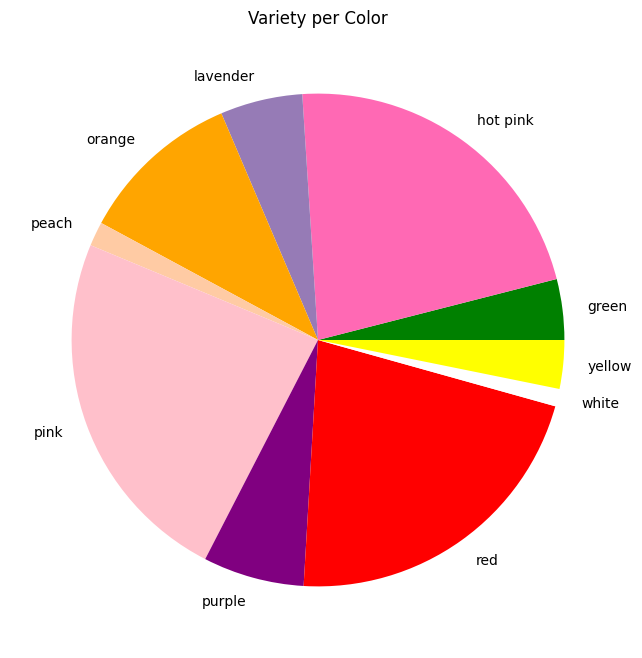

In [19]:
no_roses_arrangements = all_arrangements[~all_arrangements['Arrangement'].str.contains('V1R|B59')]

# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    no_roses_arrangements[col] = pd.to_numeric(no_roses_arrangements[col], errors='coerce')

# Calculate the total volume for each color
color_volume = no_roses_arrangements.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(10, 8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)

plt.title('Variety per Color')

# Position the legend outside the chart area
plt.savefig('Variety per Color with out V1R and B59 Borderless')
plt.show()



<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2111271979.py:2: DeprecationWarning: invalid escape sequence '\d'
  no_roses_arrangements['Year'] = no_roses_arrangements['Arrangement'].str.extract('(\d{4})').astype(int)
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2111271979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_roses_arrangements['Year'] = no_roses_arrangements['Arrangement'].str.extract('(\d{4})').astype(int)
/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2111271979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

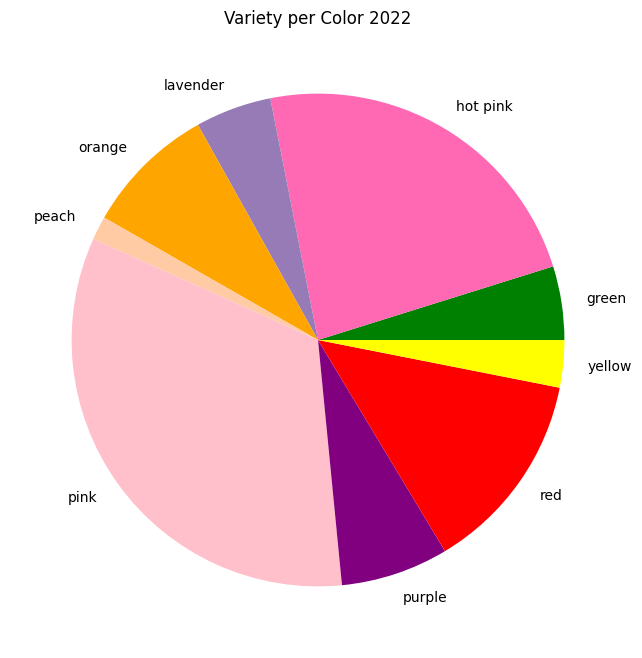

/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/2111271979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Colors'] = data['Colors'].str.lower().str.strip()


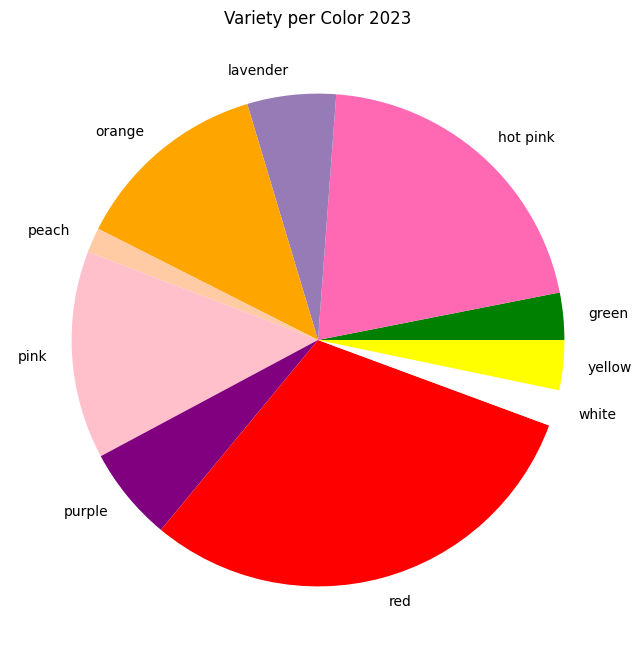

In [20]:
# Extract the year from the Arrangement column
no_roses_arrangements['Year'] = no_roses_arrangements['Arrangement'].str.extract('(\d{4})').astype(int)

# Split the data based on the year
data_2022 = no_roses_arrangements[no_roses_arrangements['Year'] == 2022]
data_2023 = no_roses_arrangements[no_roses_arrangements['Year'] == 2023]

for data, year in zip([data_2022, data_2023], ['2022', '2023']):
    data['Colors'] = data['Colors'].str.lower().str.strip()
    # Remove rows with NaN values in the 'Colors' column
    data = data[data['Colors'].notna()]

    # Convert the quantity columns to numeric
    for col in ['SQty', 'DQty', 'PQty', 'EQty']:
        data.loc[:, col] = pd.to_numeric(data.loc[:, col], errors='coerce')

    # Calculate the total volume for each color
    color_volume = data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

    # Filter out colors with 0 sales volume
    color_volume = color_volume[color_volume != 0]

    # Define the custom colors
    custom_colors = {
        'hot pink': '#FF69B4',
        'orange': '#FFA500',
        'pink': '#FFC0CB',
        'green': '#008000',
        'purple': '#800080',
        'yellow': '#FFFF00',
        'white': '#FFFFFF',
        'peach': '#ffcba4',
        'lavender': '#967bb6',
        'light pink': '#FFB6C1',
        'red': '#FF0000',
        'pale pink': '#FFEFD5',
        'blue': '#8EA5C5',
        'ivory': '#f5f5dc'
    }

    # Create the pie chart with custom colors
    custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
    colors = [custom_colors[color] for color in color_volume.index]

    # Adjust the figure size
    plt.figure(figsize=(10, 8))

    # Create the pie chart with updated colors
    patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)

    plt.title(f'Variety per Color {year}')

    plt.savefig(f'Variety per Color with out V1R and B59 Borderless {year}')
    plt.show()


In [21]:
# Assuming all_arrangements is your original dataframe, you create a copy of it 
# that includes only columns from index 0 up to index 13 (not including 13).
all_arrangements_copy = all_arrangements.iloc[:, 0:12].copy()

# Make sure 'Year' and 'Arrangement_Code' are not in the dataframe columns
if 'Year' in all_arrangements_copy.columns:
    all_arrangements_copy = all_arrangements_copy.drop(columns='Year')

if 'Arrangement_Code' in all_arrangements_copy.columns:
    all_arrangements_copy = all_arrangements_copy.drop(columns='Arrangement_Code')

# Now, remove "_processed" from 'Arrangement' and split it into two columns: 'Year' and 'Arrangement_Code'
all_arrangements_copy['Arrangement'] = all_arrangements_copy['Arrangement'].str.rstrip('_processed')
split_arrangement = all_arrangements_copy['Arrangement'].str.split('_', n=1, expand=True)
all_arrangements_copy['Year'] = split_arrangement[0]
all_arrangements_copy['Arrangement_Code'] = split_arrangement[1]

# For df_2022 dataframe
if df_2022['Featured Product Set Code'].str.contains('_').any():
    split_df_2022 = df_2022['Featured Product Set Code'].str.split('_', expand=True)
    df_2022['Year'] = split_df_2022[0]
    df_2022['Arrangement_Code'] = split_df_2022[1]
else:
    df_2022['Year'] = '2022'  # Assigning 2022 as default year
    df_2022['Arrangement_Code'] = df_2022['Featured Product Set Code']

# For df_2023 dataframe
if df_2023['Featured Product Set Code'].str.contains('_').any():
    split_df_2023 = df_2023['Featured Product Set Code'].str.split('_', expand=True)
    df_2023['Year'] = split_df_2023[0]
    df_2023['Arrangement_Code'] = split_df_2023[1]
else:
    df_2023['Year'] = '2023'  # Assigning 2023 as default year
    df_2023['Arrangement_Code'] = df_2023['Featured Product Set Code']

# Merging all three dataframes
df_merged_2022 = pd.merge(all_arrangements_copy, df_2022, how='left', on=['Year', 'Arrangement_Code'])
df_merged_2023 = pd.merge(all_arrangements_copy, df_2023, how='left', on=['Year', 'Arrangement_Code'])

# For df_2022, keep only the rows where Year is '2022'
df_merged_2022 = df_merged_2022[df_merged_2022['Year'] == '2022']

# For df_2023, keep only the rows where Year is '2023'
df_merged_2023 = df_merged_2023[df_merged_2023['Year'] == '2023']
df_merged_2023.dropna(subset=['Featured Product Set Code'], inplace=True)


In [22]:
# Making a copy to avoid changing the original data
df_2022C = df_merged_2022.copy()
df_2023C = df_merged_2023.copy()

# Convert object columns to category and encode
for col in df_2022C.select_dtypes('object'):
    df_2022C[col] = df_2022C[col].astype('category').cat.codes

for col in df_2023C.select_dtypes('object'):
    df_2023C[col] = df_2023C[col].astype('category').cat.codes

# Now you can compute correlation
corr_2022 = df_2022C.corr()
corr_2023 = df_2023C.corr()


/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_10702/1888067551.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


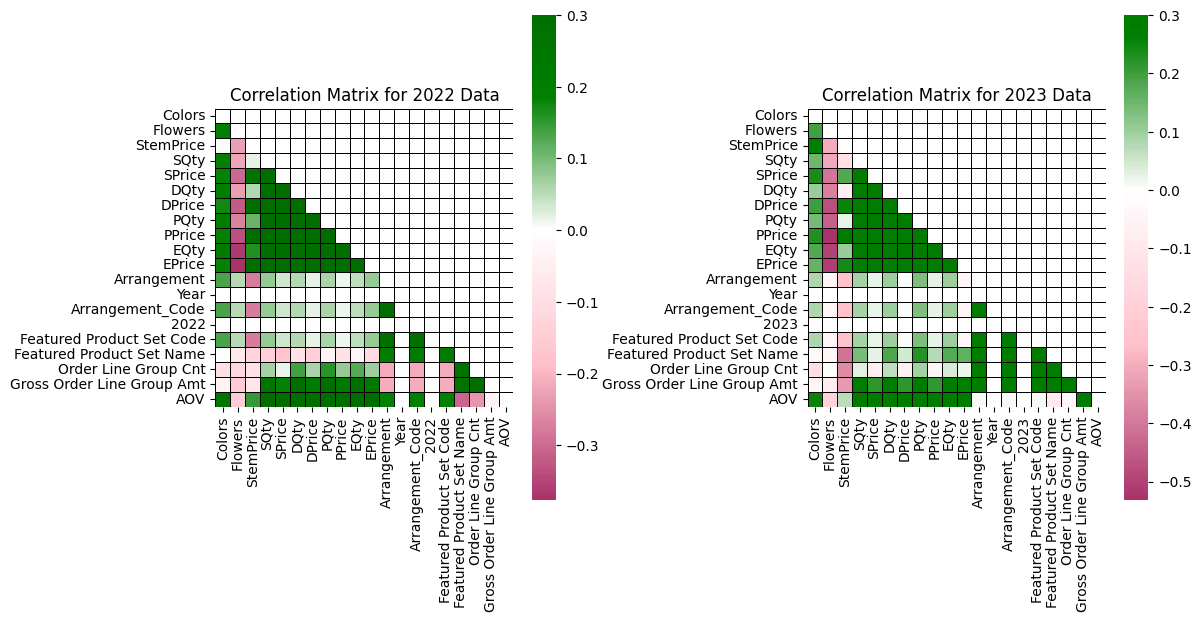

In [23]:
import matplotlib.colors as mcolors
import seaborn as sns
# Calculate the correlation matrix
corr_2022 = df_2022C.corr()
corr_2023 = df_2023C.corr()

# Generate a mask for the upper triangle of each correlation matrix
mask_2022 = np.triu(np.ones_like(corr_2022, dtype=bool))
mask_2023 = np.triu(np.ones_like(corr_2023, dtype=bool))

# Define the colors for the gradient colormap
colors = ['#AA336A', 'pink', 'white', 'green', 'darkgreen']

# Create a custom colormap with a gradient
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Draw the heatmap with the custom colormap for 2022 data
plt.subplot(1, 2, 1)
sns.heatmap(corr_2022, mask=mask_2022, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('Correlation Matrix for 2022 Data')

# Draw the heatmap with the custom colormap for 2023 data
plt.subplot(1, 2, 2)
sns.heatmap(corr_2023, mask=mask_2023, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('Correlation Matrix for 2023 Data')

plt.tight_layout()
plt.savefig('Correlation Matrices Combined')
plt.show()


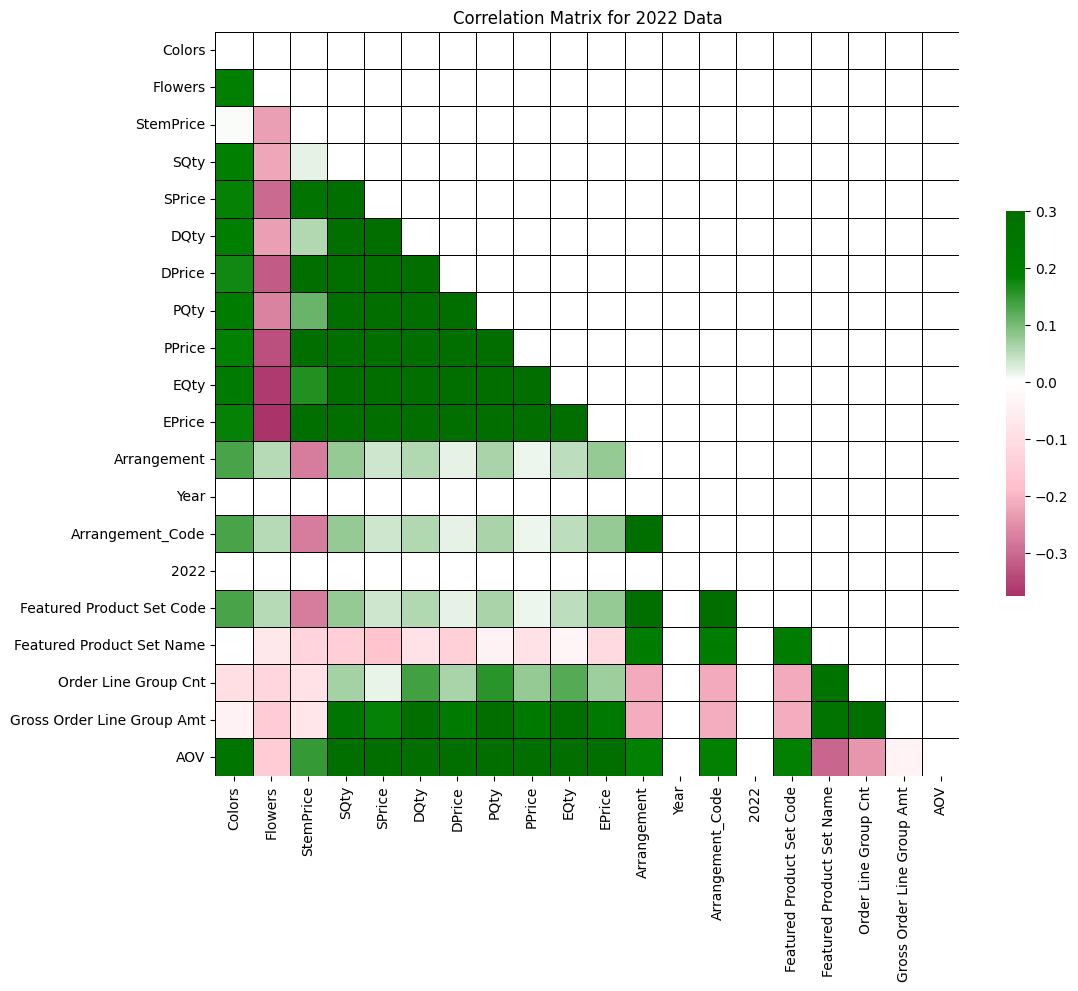

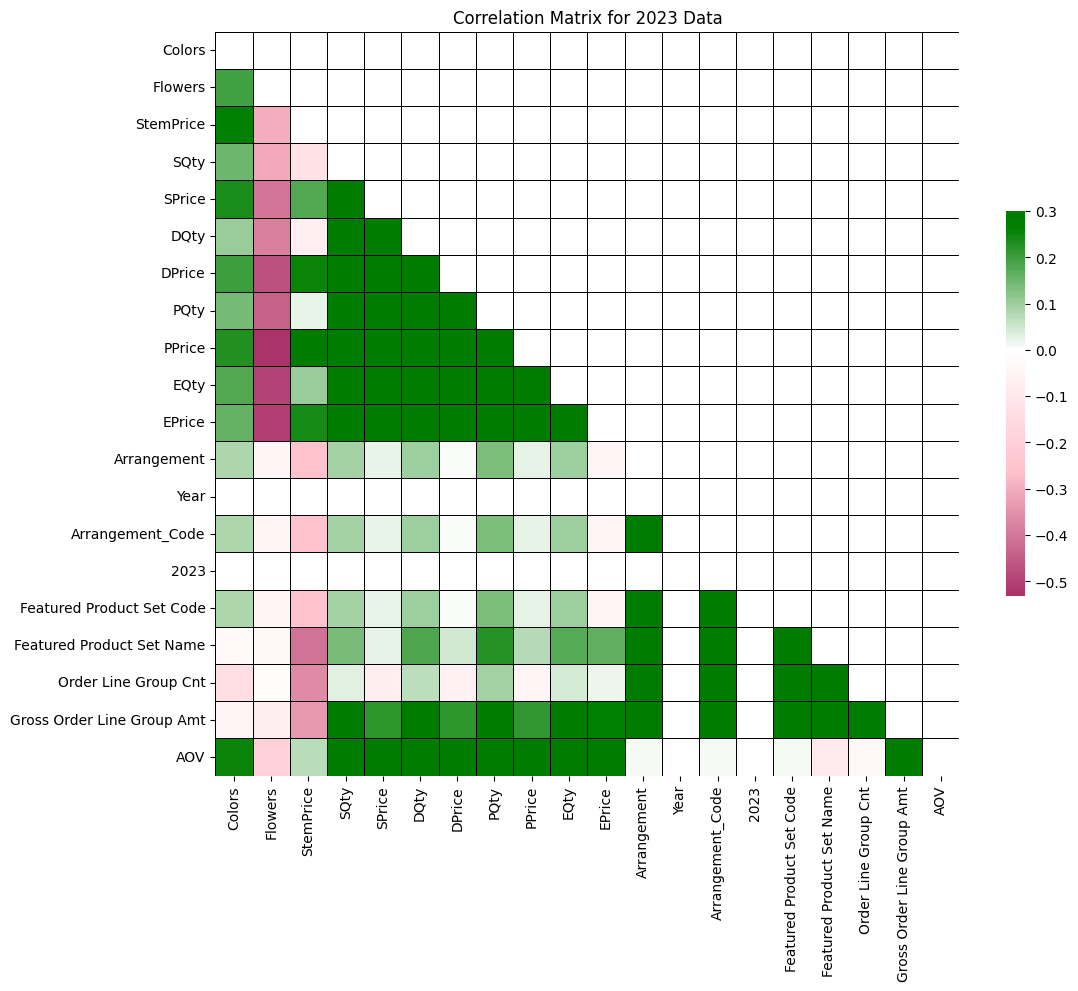

In [24]:
# Calculate the correlation matrix
corr_2022 = df_2022C.corr()
corr_2023 = df_2023C.corr()

# Generate a mask for the upper triangle of each correlation matrix
mask_2022 = np.triu(np.ones_like(corr_2022, dtype=bool))
mask_2023 = np.triu(np.ones_like(corr_2023, dtype=bool))

# Define the colors for the gradient colormap
colors = ['#AA336A', 'pink', 'white', 'green', 'darkgreen']

# Create a custom colormap with a gradient
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors)

# Set up the matplotlib figure for 2022
f, ax = plt.subplots(figsize=(12,10))

# Draw the heatmap with the custom colormap for 2022 data
sns.heatmap(corr_2022, mask=mask_2022, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('Correlation Matrix for 2022 Data')
plt.savefig('Correlation Matrix for 2022 Data')
plt.show()

# Set up the matplotlib figure for 2023
f, ax = plt.subplots(figsize=(12,10))

# Draw the heatmap with the custom colormap for 2023 data
sns.heatmap(corr_2023, mask=mask_2023, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('Correlation Matrix for 2023 Data')
plt.savefig('Correlation Matrix for 2023 Data')
plt.show()

In [25]:
# For DataFrame df_2022
print("---- Descriptive Statistics for 2022 Data ----")
print(df_2022.describe(include='all'))

# For DataFrame df_2023
print("---- Descriptive Statistics for 2023 Data ----")
print(df_2023.describe(include='all'))



---- Descriptive Statistics for 2022 Data ----
                     2022 Featured Product Set Code Featured Product Set Name  \
count                  10                        10                        10   
unique                  1                        10                        10   
top     Florist Delivered                     C5375  Light of My Life Bouquet   
freq                   10                         1                         1   
mean                  NaN                       NaN                       NaN   
std                   NaN                       NaN                       NaN   
min                   NaN                       NaN                       NaN   
25%                   NaN                       NaN                       NaN   
50%                   NaN                       NaN                       NaN   
75%                   NaN                       NaN                       NaN   
max                   NaN                       NaN           

In [26]:
print(df_2022['AOV'].describe())
print(df_2023['Order Line Group Cnt'].describe())

count     10.000000
mean     109.031000
std       22.939076
min       88.470000
25%       95.662500
50%      101.085000
75%      108.080000
max      157.550000
Name: AOV, dtype: float64
count       10.000000
mean      9218.200000
std       3230.496584
min       5112.000000
25%       6623.750000
50%       8839.000000
75%      11006.250000
max      14664.000000
Name: Order Line Group Cnt, dtype: float64


The descriptive statistics give us a detailed overview of the numerical variables in the dataset for 2022 and 2023.

For the 2022 data:

1. **Order Line Group Cnt**: This variable shows the count of order lines. The average count in 2022 is about 11,761 with a standard deviation of about 8,799. The minimum count is 5,062 and the maximum is 31,203. The median (50th percentile) is 7,687.

2. **Gross Order Line Group Amt**: This is likely the total monetary amount for the order lines. The average amount in 2022 is about $1,272,554 with a standard deviation of about $982,751. The minimum amount is about $517,336 and the maximum is about $3,341,509.

3. **AOV (Average Order Value)**: The average order value in 2022 is about $109.03 with a standard deviation of about $22.94. The minimum AOV is $88.47 and the maximum is $157.55.

For the 2023 data:

1. **Order Line Group Cnt**: The average count in 2023 is about 9,218 with a standard deviation of about 3,230. The minimum count is 5,112 and the maximum is 14,664. The median (50th percentile) is 8,839.

2. **Gross Order Line Group Amt**: The average amount in 2023 is about $992,804 with a standard deviation of about $358,061. The minimum amount is about $494,626 and the maximum is about $1,365,605.

3. **AOV (Average Order Value)**: The average order value in 2023 is about $108.17 with a standard deviation of about $22.85. The minimum AOV is $85.64 and the maximum is $152.48.

From the summary statistics, you can observe that the average order value (AOV) seems relatively stable from 2022 to 2023, while the number of order lines ("Order Line Group Cnt") seems to have decreased on average in 2023 compared to 2022. Similarly, the gross order line group amount also seems to have decreased in 2023 compared to 2022.

Please note that these interpretations are based on the assumption that the dataset is representative and random. For a more in-depth analysis, you may want to perform hypothesis testing or use inferential statistics.

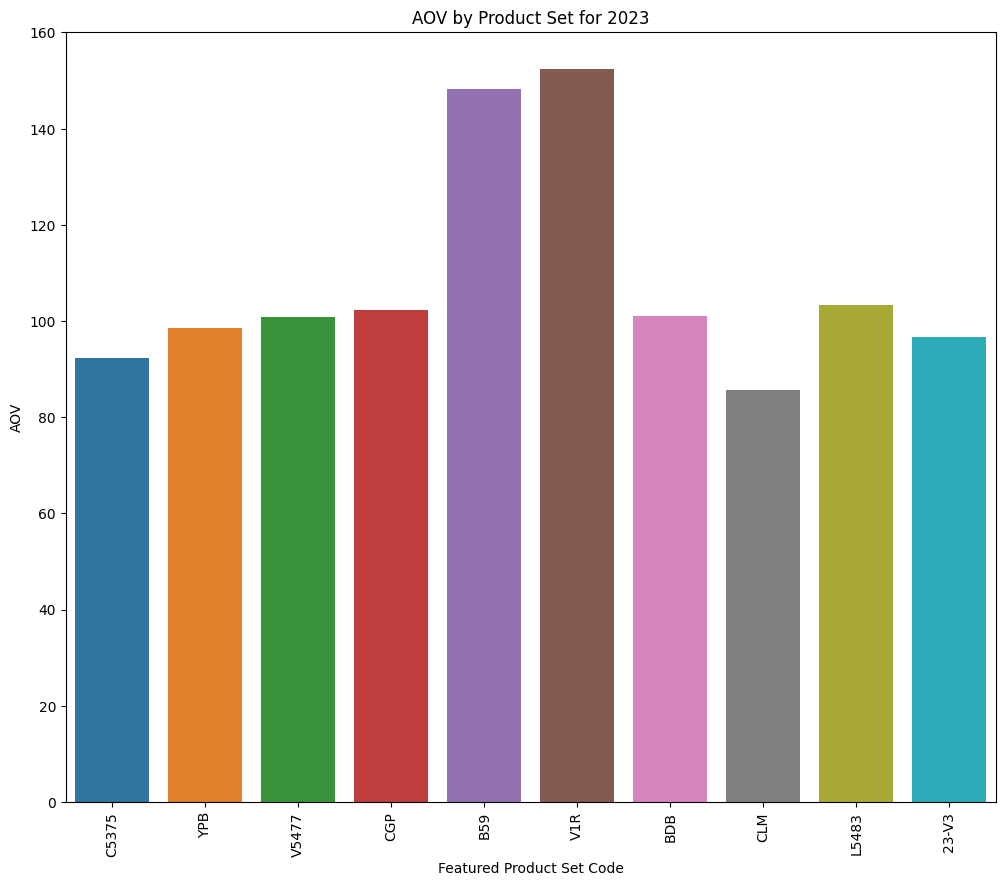

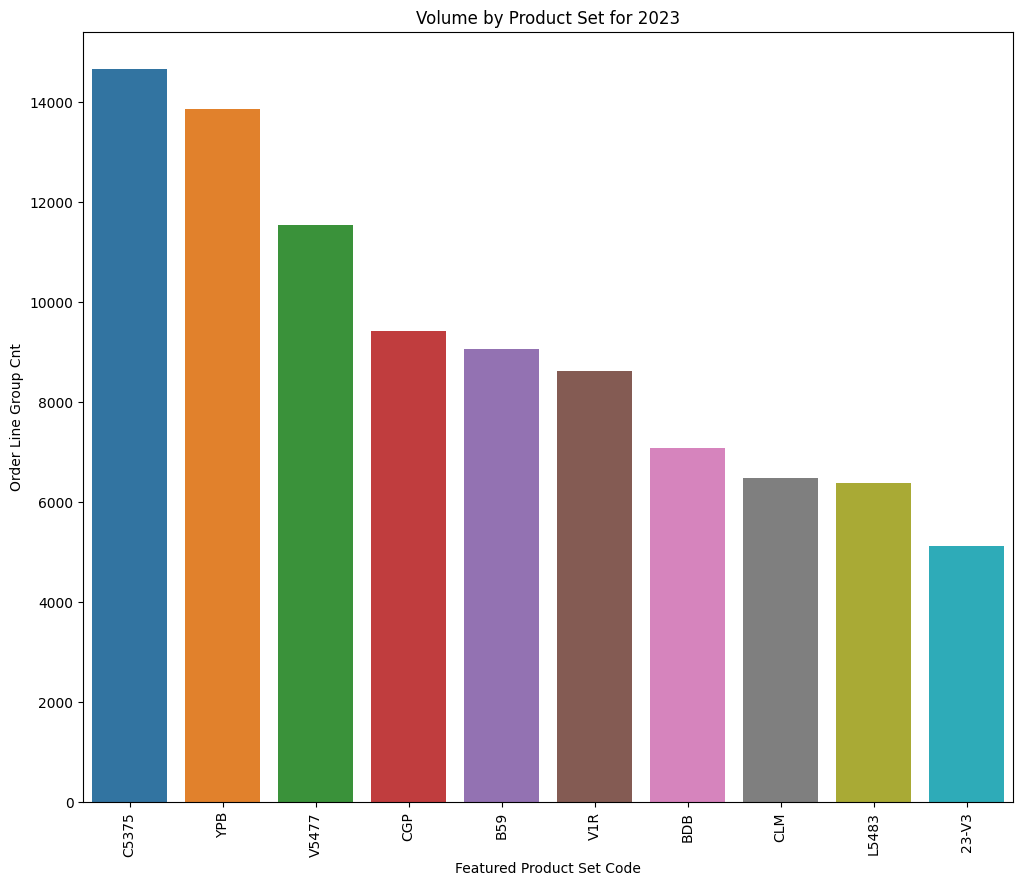

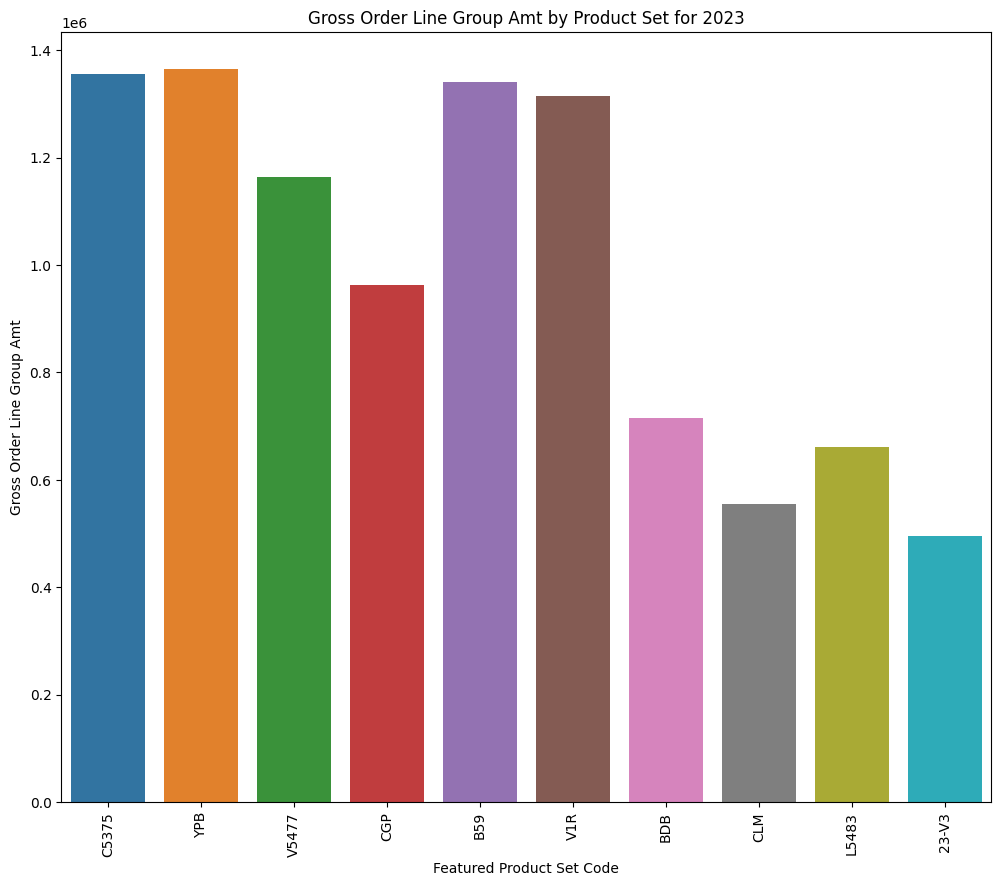

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
df_2023_top10 = df_2023.copy()
# Assuming you've converted your data to a DataFrame named 'df_2023_top10'

# Convert 'Gross Order Line Group Amt' and 'AOV' to numeric values 
# (they appear to be strings with dollar signs)
df_2023_top10['Gross Order Line Group Amt'] = df_2023_top10['Gross Order Line Group Amt'].replace('[\\$,]', '', regex=True).astype(float)
df_2023_top10['AOV'] = df_2023_top10['AOV'].replace('[\\$,]', '', regex=True).astype(float)

# For AOV
plt.figure(figsize=(12,10))
sns.barplot(x='Featured Product Set Code', y='AOV', data=df_2023_top10)
plt.title('AOV by Product Set for 2023')
plt.xticks(rotation=90) # Rotating x labels for better visibility if they are long
plt.savefig('AOV by Product Set for 2023')
plt.show()

# For Order Line Group Cnt
plt.figure(figsize=(12,10))
sns.barplot(x='Featured Product Set Code', y='Order Line Group Cnt', data=df_2023_top10)
plt.title('Volume by Product Set for 2023')
plt.xticks(rotation=90) # Rotating x labels for better visibility if they are long
plt.savefig('Volume by Product Set for 2023')
plt.show()

# For Gross Order Line Group Amt
plt.figure(figsize=(12,10))
sns.barplot(x='Featured Product Set Code', y='Gross Order Line Group Amt', data=df_2023_top10)
plt.title('Gross Order Line Group Amt by Product Set for 2023')
plt.xticks(rotation=90) # Rotating x labels for better visibility if they are long
plt.savefig('Gross Order Line Group Amt by Product Set for 2023')
plt.show()


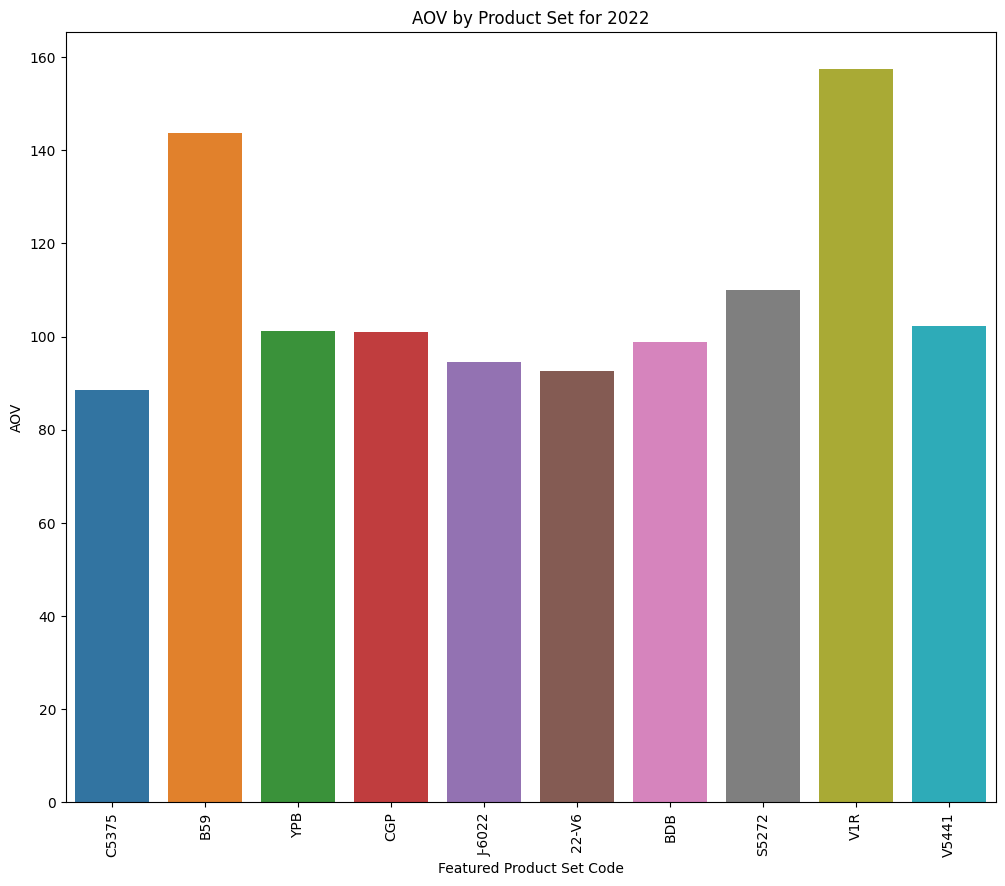

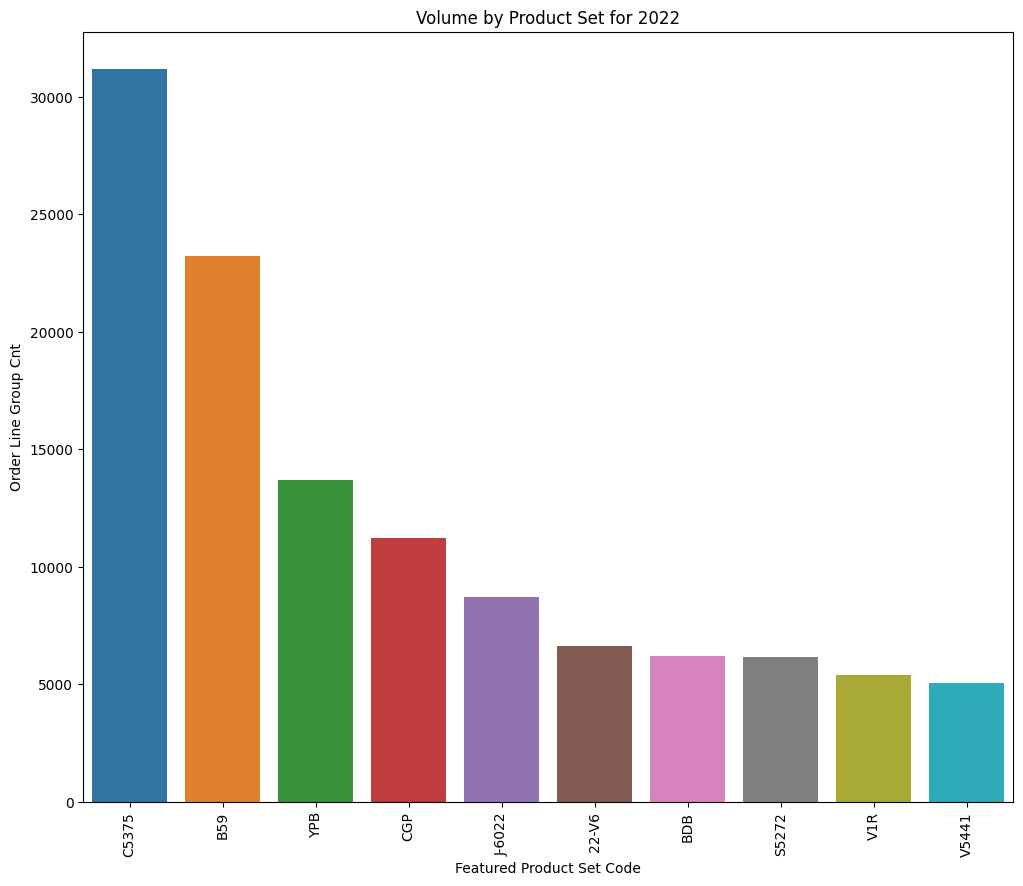

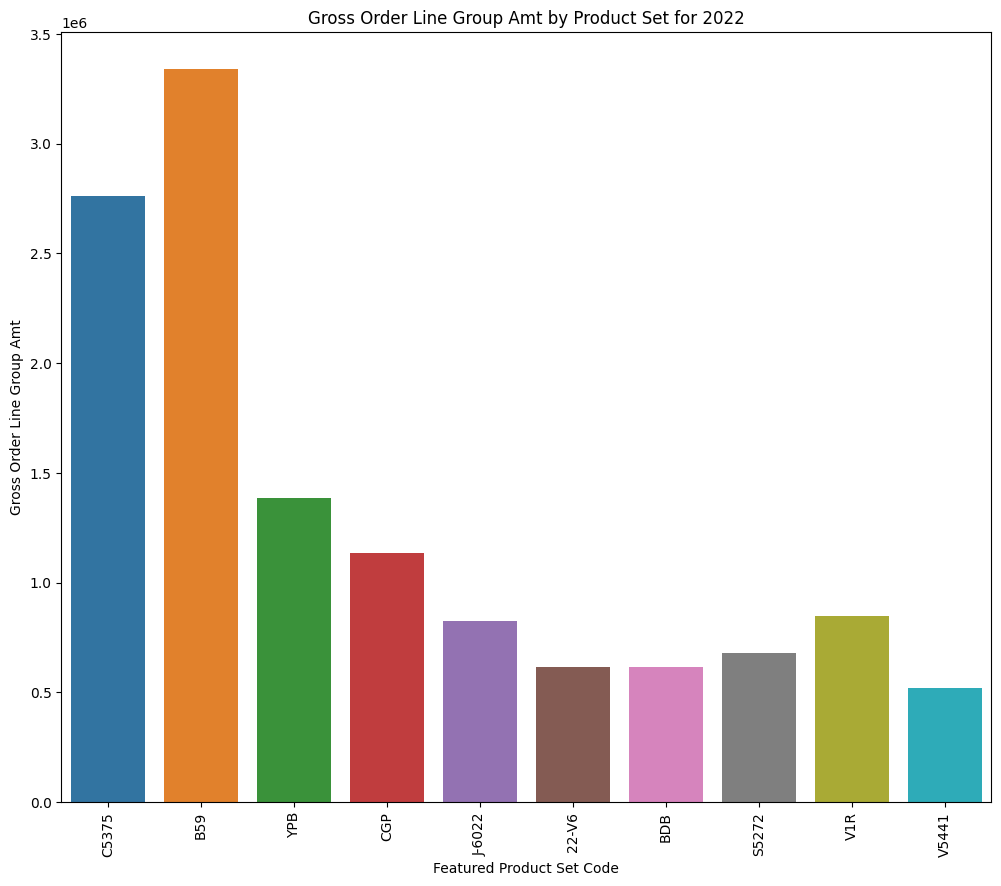

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
df_2022_top10 = df_2022.copy()
# Assuming you've converted your data to a DataFrame named 'df_2023_top10'

# Convert 'Gross Order Line Group Amt' and 'AOV' to numeric values 
# (they appear to be strings with dollar signs)
df_2022_top10['Gross Order Line Group Amt'] = df_2022_top10['Gross Order Line Group Amt'].replace('[\\$,]', '', regex=True).astype(float)
df_2022_top10['AOV'] = df_2022_top10['AOV'].replace('[\\$,]', '', regex=True).astype(float)

# For AOV
plt.figure(figsize=(12,10))
sns.barplot(x='Featured Product Set Code', y='AOV', data=df_2022_top10)
plt.title('AOV by Product Set for 2022')
plt.xticks(rotation=90) # Rotating x labels for better visibility if they are long
plt.savefig('AOV by Product Set for 2022')
plt.show()

# For Order Line Group Cnt
plt.figure(figsize=(12,10))
sns.barplot(x='Featured Product Set Code', y='Order Line Group Cnt', data=df_2022_top10)
plt.title('Volume by Product Set for 2022')
plt.xticks(rotation=90) # Rotating x labels for better visibility if they are long
plt.savefig('Volume by Product Set for 2022')
plt.show()

# For Gross Order Line Group Amt
plt.figure(figsize=(12,10))
sns.barplot(x='Featured Product Set Code', y='Gross Order Line Group Amt', data=df_2022_top10)
plt.title('Gross Order Line Group Amt by Product Set for 2022')
plt.xticks(rotation=90) # Rotating x labels for better visibility if they are long
plt.savefig('Gross Order Line Group Amt by Product Set for 2022')
plt.show()


In [29]:
# Summary statistics for numerical columns
df_2022.describe(include=[np.number])

,Order Line Group Cnt,Gross Order Line Group Amt,AOV
count,10.000000,1.000000e+01,10.000000
mean,11761.400000,1.272554e+06,109.031000
std,8799.115589,9.827513e+05,22.939076
min,5062.000000,5.173360e+05,88.470000
25%,6183.500000,6.316731e+05,95.662500
50%,7686.500000,8.370735e+05,101.085000
75%,13095.250000,1.323885e+06,108.080000
max,31203.000000,3.341509e+06,157.550000


In [30]:
df_2023.describe(include=[np.number])

,Order Line Group Cnt,Gross Order Line Group Amt,AOV
count,10.000000,1.000000e+01,10.000000
mean,9218.200000,9.928045e+05,108.175000
std,3230.496584,3.580617e+05,22.851048
min,5112.000000,4.946269e+05,85.640000
25%,6623.750000,6.737672e+05,97.222500
50%,8839.000000,1.063513e+06,100.970000
75%,11006.250000,1.334562e+06,103.135000
max,14664.000000,1.365605e+06,152.480000


In [31]:
df_merged = pd.concat([df_merged_2022, df_merged_2023])

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA on Colors
model_colors = ols('Q("Gross Order Line Group Amt") ~ C(Colors)', data=df_merged_2022).fit()
anova_table_colors = sm.stats.anova_lm(model_colors, typ=2)
print(anova_table_colors)

# ANOVA on Flowers
model_flowers = ols('Q("Gross Order Line Group Amt") ~ C(Flowers)', data=df_merged_2022).fit()
anova_table_flowers = sm.stats.anova_lm(model_flowers, typ=2)
print(anova_table_flowers)

                 sum_sq    df         F  PR(>F)
C(Colors)  2.521083e+12   8.0  0.532395  0.8244
Residual   2.190106e+13  37.0       NaN     NaN
                  sum_sq    df         F    PR(>F)
C(Flowers)  1.243020e+13  19.0  1.418432  0.201184
Residual    1.199194e+13  26.0       NaN       NaN


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA on Colors
model_colors = ols('Q("Gross Order Line Group Amt") ~ C(Colors)', data=df_merged_2023).fit()
anova_table_colors = sm.stats.anova_lm(model_colors, typ=2)
print(anova_table_colors)

# ANOVA on Flowers
model_flowers = ols('Q("Gross Order Line Group Amt") ~ C(Flowers)', data=df_merged_2023).fit()
anova_table_flowers = sm.stats.anova_lm(model_flowers, typ=2)
print(anova_table_flowers)

                 sum_sq    df         F    PR(>F)
C(Colors)  4.645767e+11   9.0  0.412027  0.918887
Residual   3.883752e+12  31.0       NaN       NaN
                  sum_sq    df         F   PR(>F)
C(Flowers)  1.184109e+12  16.0  0.561327  0.88249
Residual    3.164220e+12  24.0       NaN      NaN


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA on Colors
model_colors = ols('Q("Gross Order Line Group Amt") ~ C(Colors)', data=df_merged).fit()
anova_table_colors = sm.stats.anova_lm(model_colors, typ=2)
print(anova_table_colors)

# ANOVA on Flowers
model_flowers = ols('Q("Gross Order Line Group Amt") ~ C(Flowers)', data=df_merged).fit()
anova_table_flowers = sm.stats.anova_lm(model_flowers, typ=2)
print(anova_table_flowers)

                 sum_sq    df         F    PR(>F)
C(Colors)  1.868616e+12   9.0  0.580748  0.808977
Residual   2.752839e+13  77.0       NaN       NaN
                  sum_sq    df         F    PR(>F)
C(Flowers)  7.164528e+12  19.0  1.136373  0.337928
Residual    2.223248e+13  67.0       NaN       NaN


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA on Colors
model_colors = ols('Q("AOV") ~ C(Colors)', data=df_merged_2022).fit()
anova_table_colors = sm.stats.anova_lm(model_colors, typ=2)
print(anova_table_colors)

# ANOVA on Flowers
model_flowers = ols('Q("AOV") ~ C(Flowers)', data=df_merged_2022).fit()
anova_table_flowers = sm.stats.anova_lm(model_flowers, typ=2)
print(anova_table_flowers)

                sum_sq    df         F    PR(>F)
C(Colors)  2119.224664   8.0  2.111036  0.059516
Residual   4642.941060  37.0       NaN       NaN
                 sum_sq    df         F    PR(>F)
C(Flowers)  2550.208611  19.0  0.828536  0.659491
Residual    4211.957113  26.0       NaN       NaN


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA on Colors
model_colors = ols('Q("AOV") ~ C(Colors)', data=df_merged_2023).fit()
anova_table_colors = sm.stats.anova_lm(model_colors, typ=2)
print(anova_table_colors)

# ANOVA on Flowers
model_flowers = ols('Q("AOV") ~ C(Flowers)', data=df_merged_2023).fit()
anova_table_flowers = sm.stats.anova_lm(model_flowers, typ=2)
print(anova_table_flowers)

                sum_sq    df         F    PR(>F)
C(Colors)  1445.242905   9.0  0.979846  0.475431
Residual   5080.447744  31.0       NaN       NaN
                 sum_sq    df        F    PR(>F)
C(Flowers)  3168.324165  16.0  1.41554  0.214973
Residual    3357.366483  24.0      NaN       NaN


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA on Colors
model_colors = ols('Q("AOV") ~ C(Colors)', data=df_merged).fit()
anova_table_colors = sm.stats.anova_lm(model_colors, typ=2)
print(anova_table_colors)

# ANOVA on Flowers
model_flowers = ols('Q("AOV") ~ C(Flowers)', data=df_merged).fit()
anova_table_flowers = sm.stats.anova_lm(model_flowers, typ=2)
print(anova_table_flowers)

                 sum_sq    df         F    PR(>F)
C(Colors)   3190.759161   9.0  2.699423  0.008745
Residual   10112.795462  77.0       NaN       NaN
                 sum_sq    df         F   PR(>F)
C(Flowers)  5650.522066  19.0  2.603612  0.00212
Residual    7653.032557  67.0       NaN      NaN


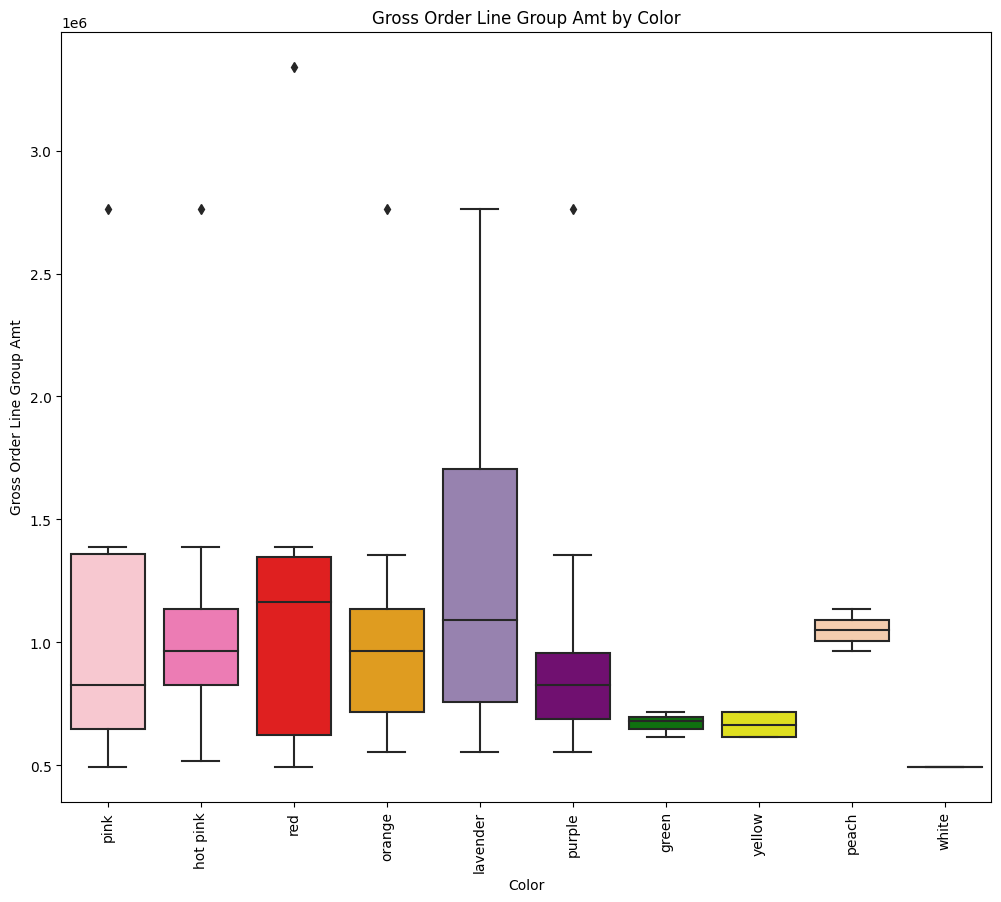

In [38]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Colors', y='Gross Order Line Group Amt', data=df_merged, palette=custom_colors)
plt.title('Gross Order Line Group Amt by Color')
plt.xlabel('Color')
plt.ylabel('Gross Order Line Group Amt')
plt.savefig('Gross Order Line Group Amt by Color')
plt.xticks(rotation=90)  # Rotates X-Axis Labels for better visibility
plt.show()


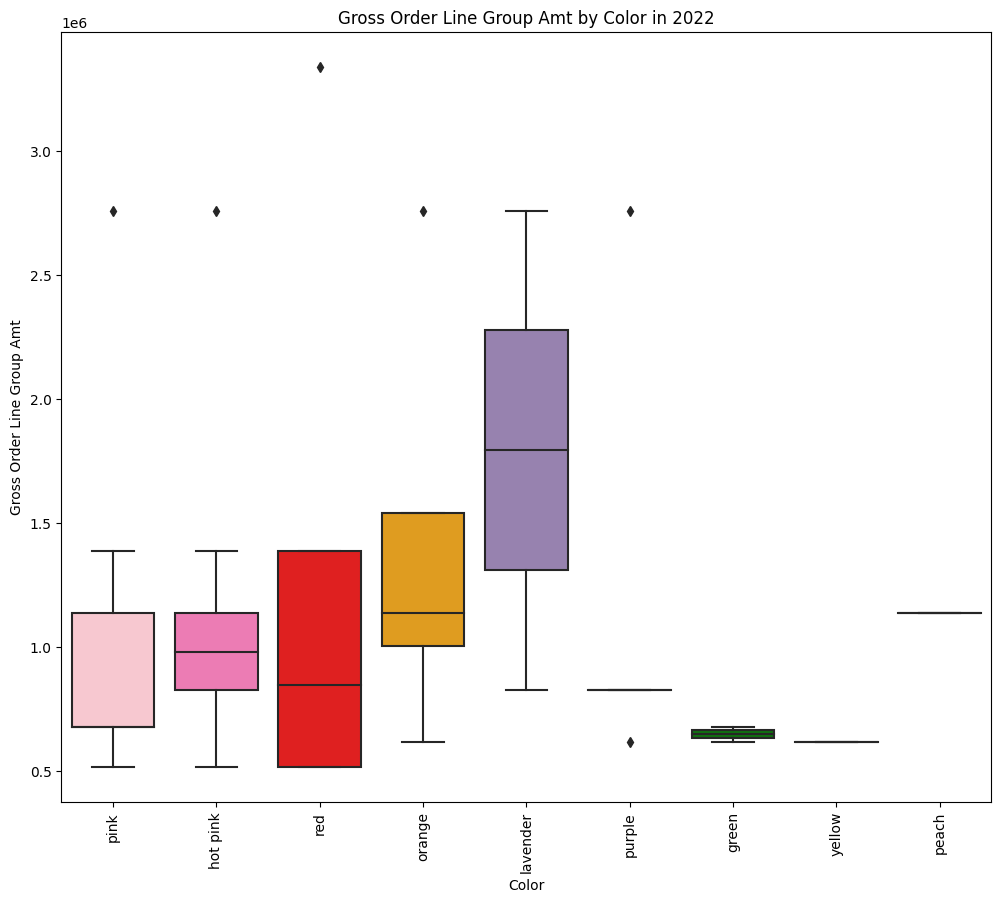

In [39]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Colors', y='Gross Order Line Group Amt', data=df_merged_2022, palette=custom_colors)
plt.title('Gross Order Line Group Amt by Color in 2022')
plt.xlabel('Color')
plt.ylabel('Gross Order Line Group Amt')
plt.savefig('Gross Order Line Group Amt by Color in 2022')
plt.xticks(rotation=90)  # Rotates X-Axis Labels for better visibility
plt.show()


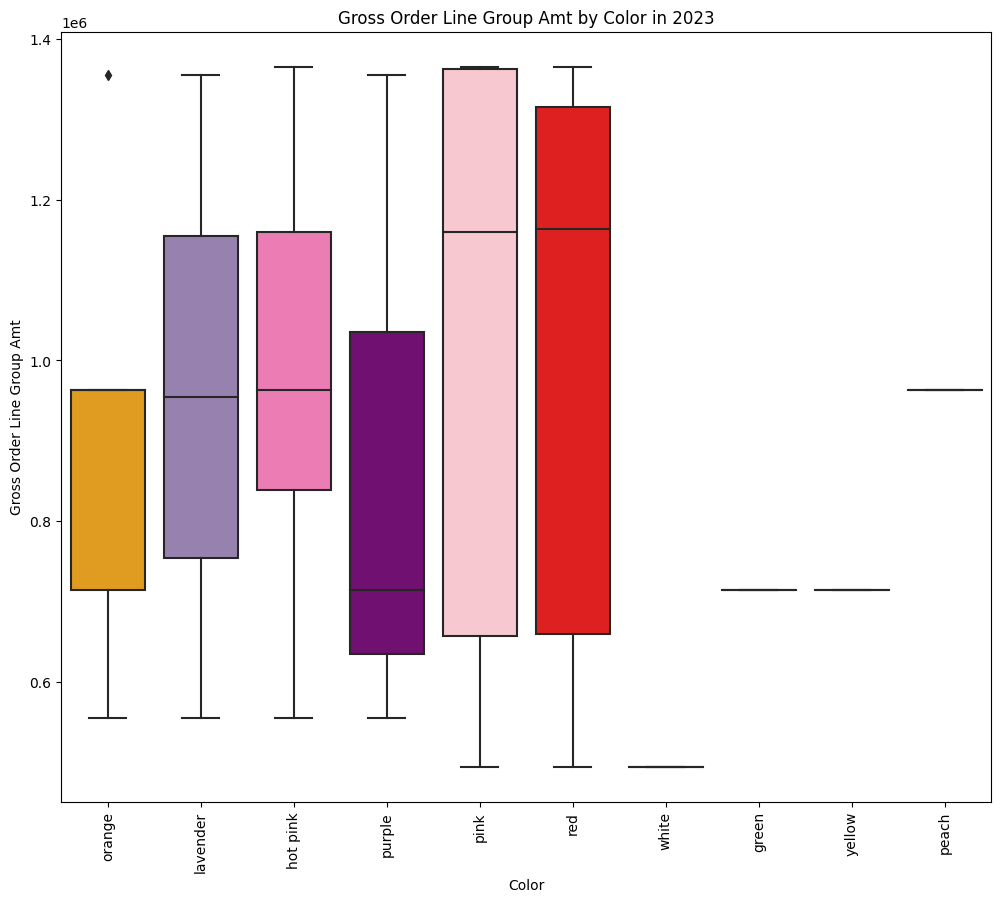

In [40]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Colors', y='Gross Order Line Group Amt', data=df_merged_2023, palette=custom_colors)
plt.title('Gross Order Line Group Amt by Color in 2023')
plt.xlabel('Color')
plt.ylabel('Gross Order Line Group Amt')
plt.savefig('Gross Order Line Group Amt by Color in 2023')
plt.xticks(rotation=90)  # Rotates X-Axis Labels for better visibility
plt.show()


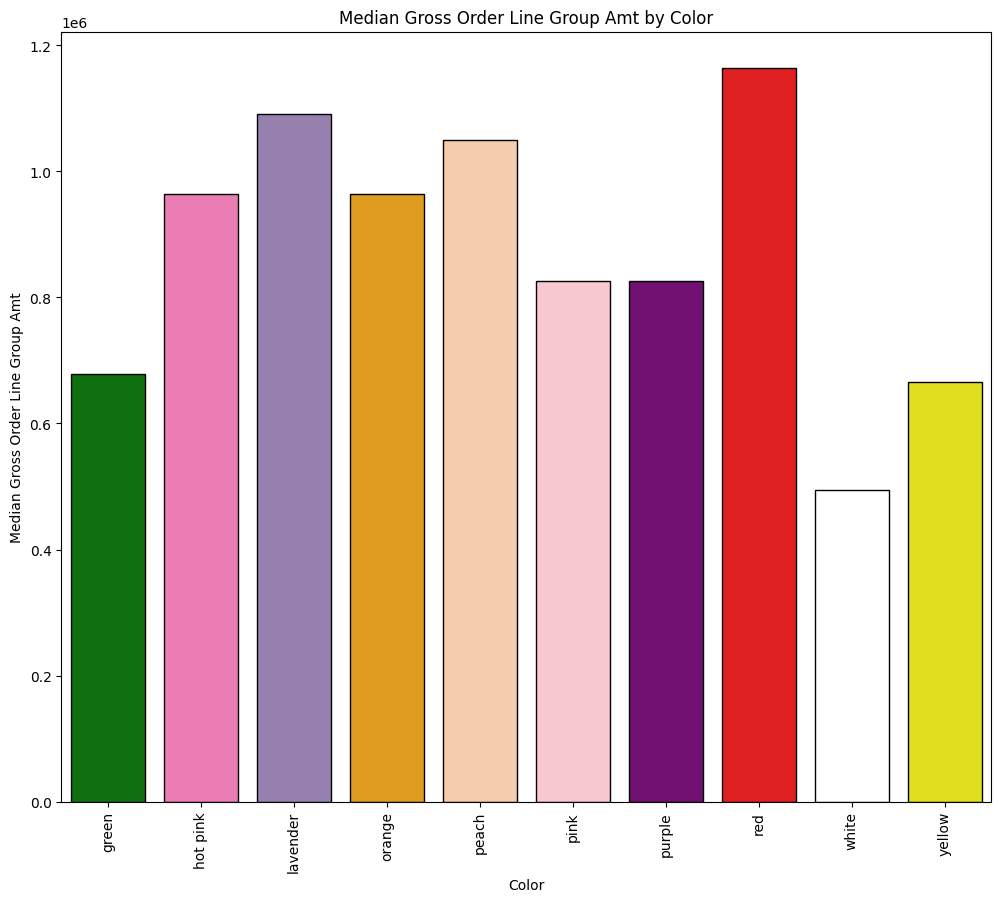

In [41]:
# Calculate median 'Gross Order Line Group Amt' for each color
color_median = df_merged.groupby('Colors')['Gross Order Line Group Amt'].median().reset_index()

# Map each color to your custom color palette
color_palette = color_median['Colors'].map(custom_colors).fillna('#000000')  # Colors not in custom_colors will be black

# Create the plot
plt.figure(figsize=(12,10))
barplot = sns.barplot(x='Colors', y='Gross Order Line Group Amt', data=color_median, palette=color_palette)

# Add borders to each bar
for rectangle in barplot.patches:
    rectangle.set_edgecolor('black')

plt.title('Median Gross Order Line Group Amt by Color')
plt.xlabel('Color')
plt.ylabel('Median Gross Order Line Group Amt')
plt.savefig('Median Gross Order Line Group Amt by Color')
plt.xticks(rotation=90)  # Rotates X-Axis Labels for better visibility
plt.show()


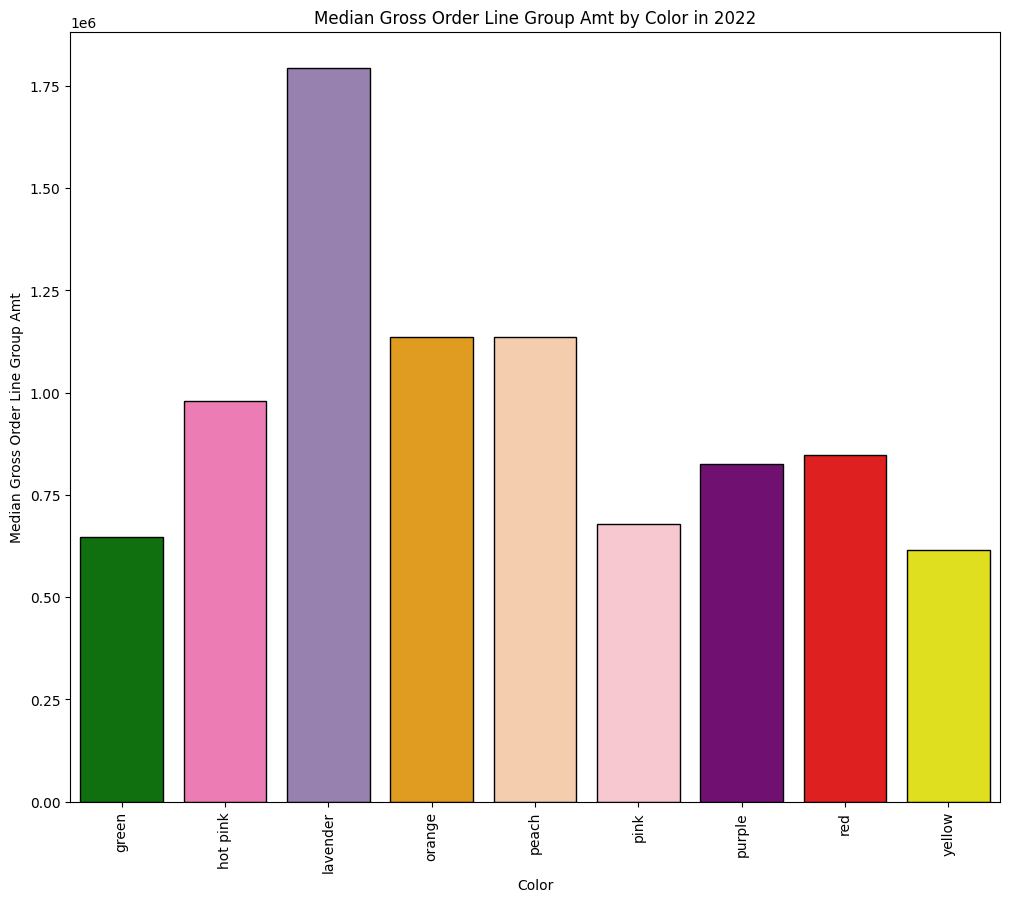

In [42]:
# Calculate median 'Gross Order Line Group Amt' for each color
color_median_2022 = df_merged_2022.groupby('Colors')['Gross Order Line Group Amt'].median().reset_index()

# Map each color to your custom color palette
color_palette = color_median_2022['Colors'].map(custom_colors).fillna('#000000')  # Colors not in custom_colors will be black

# Create the plot
plt.figure(figsize=(12,10))
barplot = sns.barplot(x='Colors', y='Gross Order Line Group Amt', data=color_median_2022, palette=color_palette)

# Add borders to each bar
for rectangle in barplot.patches:
    rectangle.set_edgecolor('black')

plt.title('Median Gross Order Line Group Amt by Color in 2022')
plt.xlabel('Color')
plt.ylabel('Median Gross Order Line Group Amt')
plt.savefig('Median Gross Order Line Group Amt by Color in 2022')
plt.xticks(rotation=90)  # Rotates X-Axis Labels for better visibility
plt.show()


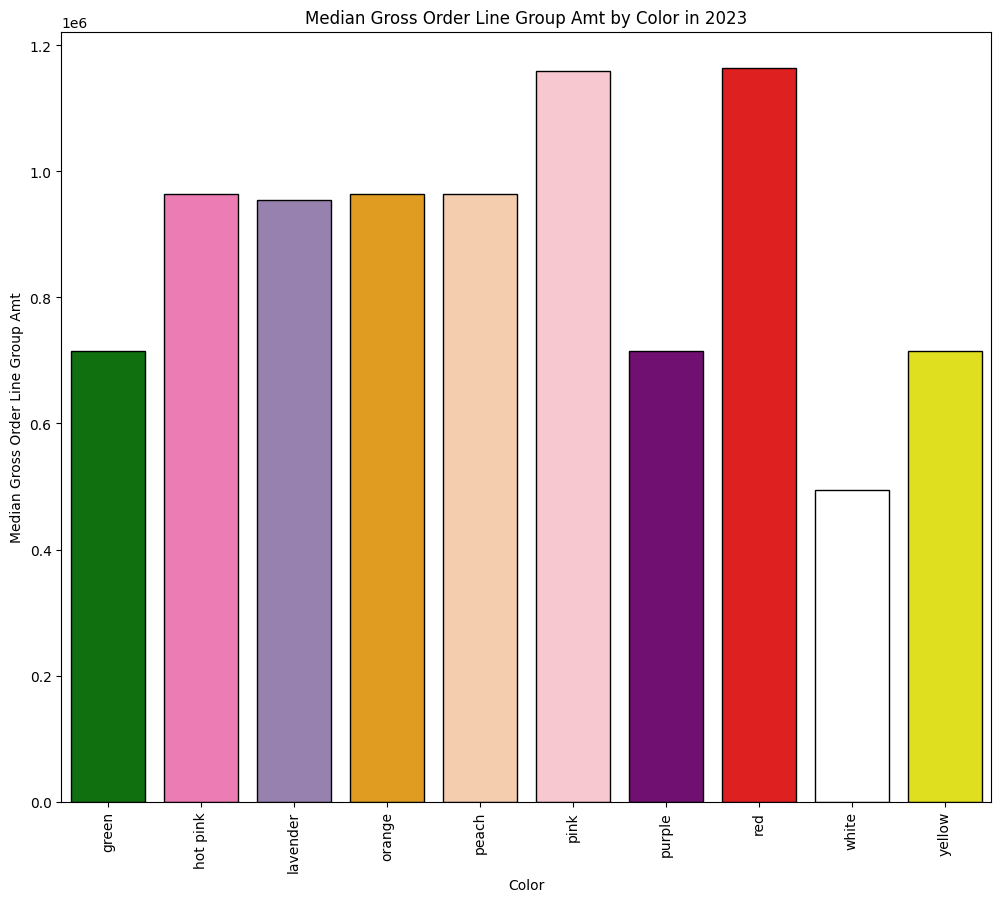

In [43]:
# Calculate median 'Gross Order Line Group Amt' for each color
color_median_2023 = df_merged_2023.groupby('Colors')['Gross Order Line Group Amt'].median().reset_index()

# Map each color to your custom color palette
color_palette = color_median_2023['Colors'].map(custom_colors).fillna('#000000')  # Colors not in custom_colors will be black

# Create the plot
plt.figure(figsize=(12,10))
barplot = sns.barplot(x='Colors', y='Gross Order Line Group Amt', data=color_median_2023, palette=color_palette)

# Add borders to each bar
for rectangle in barplot.patches:
    rectangle.set_edgecolor('black')

plt.title('Median Gross Order Line Group Amt by Color in 2023')
plt.xlabel('Color')
plt.ylabel('Median Gross Order Line Group Amt')
plt.savefig('Median Gross Order Line Group Amt by Color in 2023')
plt.xticks(rotation=90)  # Rotates X-Axis Labels for better visibility
plt.show()


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [45]:
df_merged.columns

Index([                    'Colors',                    'Flowers',
                        'StemPrice',                       'SQty',
                           'SPrice',                       'DQty',
                           'DPrice',                       'PQty',
                           'PPrice',                       'EQty',
                           'EPrice',                'Arrangement',
                             'Year',           'Arrangement_Code',
                               2022,  'Featured Product Set Code',
        'Featured Product Set Name',       'Order Line Group Cnt',
       'Gross Order Line Group Amt',                        'AOV',
                               2023],
      dtype='object')

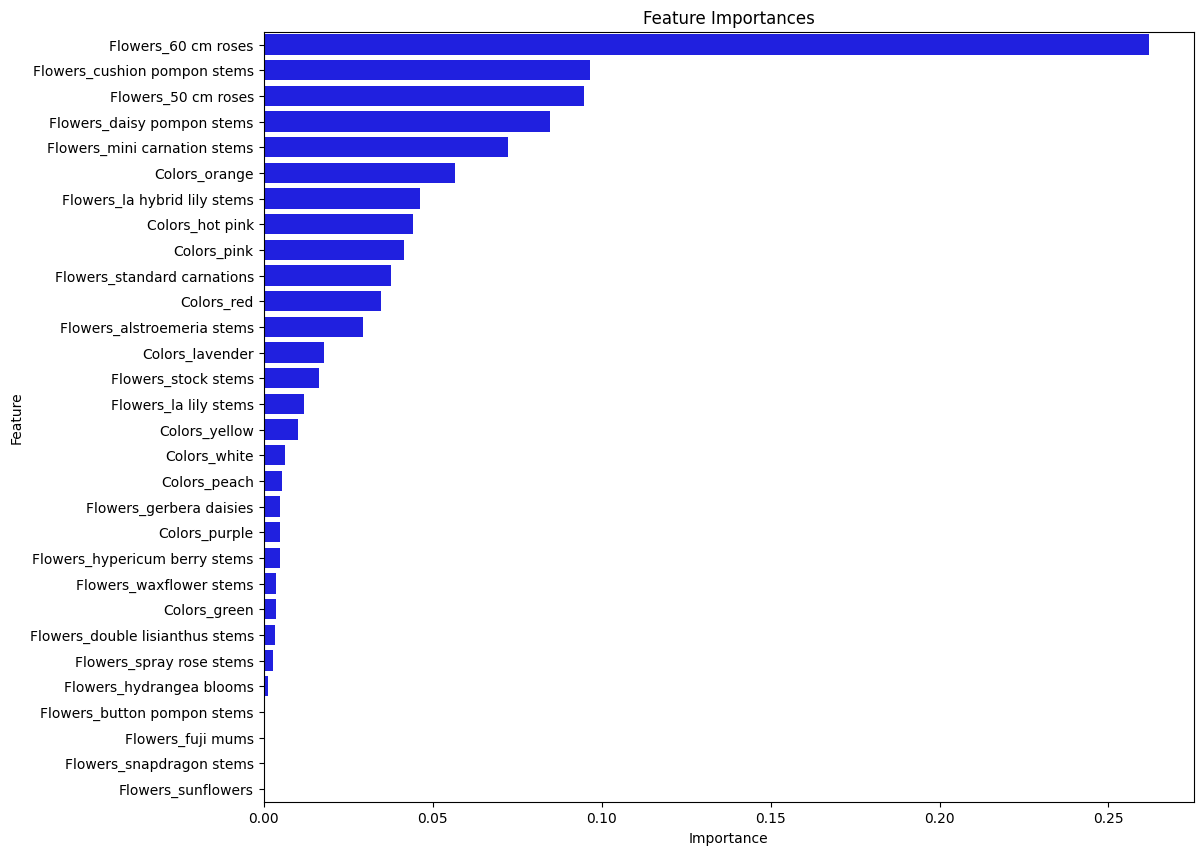

In [46]:
top_10 = df_merged[['Colors', 'Flowers','Gross Order Line Group Amt']]
# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(top_10[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatenate the encoded data with the original DataFrame
top_10_encoded = pd.concat([top_10.drop(['Colors', 'Flowers'], axis=1).reset_index(drop=True), encoded_df], axis=1)

# Separate target variable and features
y = top_10_encoded['Gross Order Line Group Amt']
X = top_10_encoded.drop(['Gross Order Line Group Amt'], axis=1)

X.columns = X.columns.astype(str)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Create a DataFrame from the imputed data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for the feature importances
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df, color='b')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature Importances by Flowers and Colors')
plt.show()


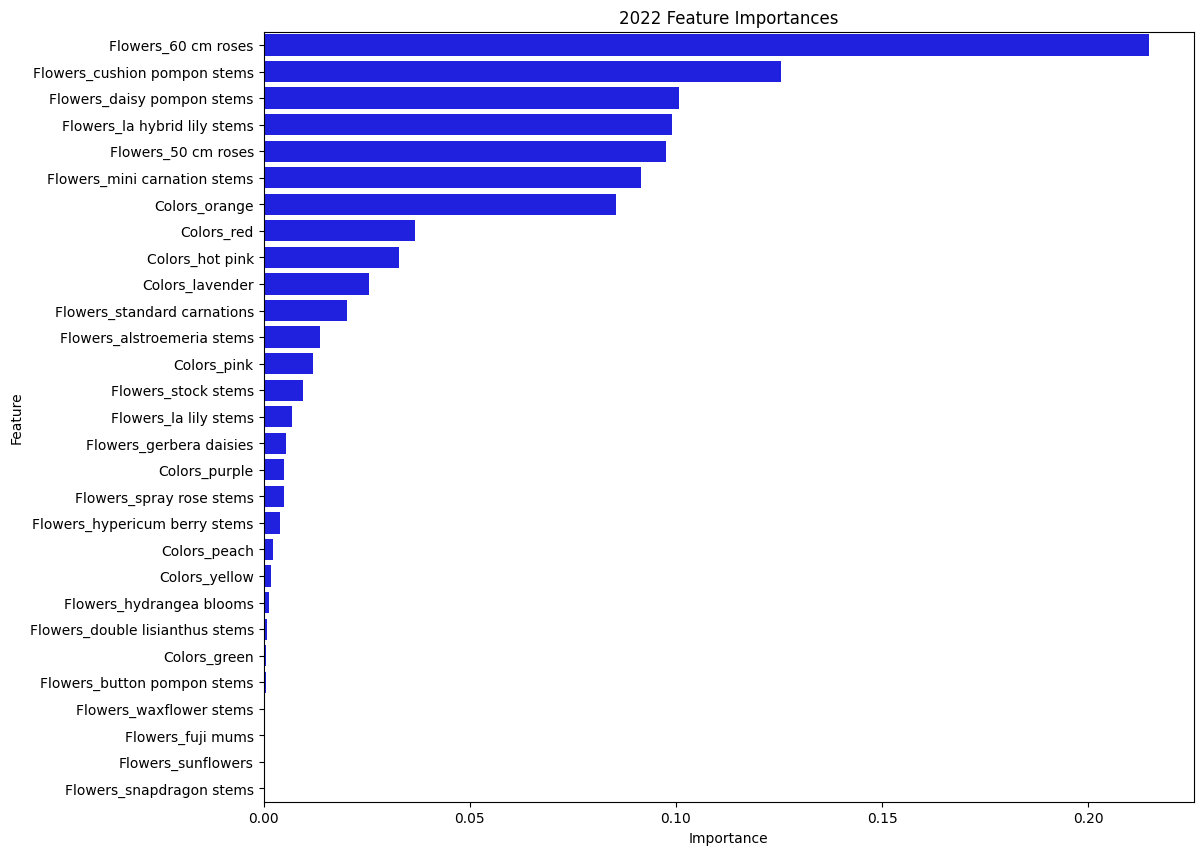

In [47]:
# You may want to replace 'top_10' with a more descriptive variable name, like 'top_10_2022'.
top_10_2022 = df_merged_2022[['Colors', 'Flowers', 'Gross Order Line Group Amt']]

# One-hot encode the categorical features
encoder_2022 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_2022 = encoder_2022.fit_transform(top_10_2022[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df_2022 = pd.DataFrame(encoded_data_2022, columns=encoder_2022.get_feature_names_out())

# Concatenate the encoded data with the original DataFrame
top_10_encoded_2022 = pd.concat([top_10_2022.drop(['Colors', 'Flowers'], axis=1).reset_index(drop=True), encoded_df_2022], axis=1)

# Separate target variable and features
y_2022 = top_10_encoded_2022['Gross Order Line Group Amt']
X_2022 = top_10_encoded_2022.drop(['Gross Order Line Group Amt'], axis=1)

X_2022.columns = X_2022.columns.astype(str)

# Impute missing values with the median
imputer_2022 = SimpleImputer(strategy='median')
X_imputed_2022 = imputer_2022.fit_transform(X_2022)

# Create a DataFrame from the imputed data
X_imputed_df_2022 = pd.DataFrame(X_imputed_2022, columns=X_2022.columns)

# Fit a Random Forest model
model_2022 = RandomForestRegressor(random_state=0)
model_2022.fit(X_imputed_df_2022, y_2022)

# Get feature importances
importances_2022 = model_2022.feature_importances_

# Create a DataFrame for the importances
importances_df_2022 = pd.DataFrame({
    'Feature': X_2022.columns,
    'Importance': importances_2022
})

# Sort the DataFrame by importance
importances_df_2022 = importances_df_2022.sort_values(by='Importance', ascending=False)

# Create a bar plot for the feature importances
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df_2022, color='b')
plt.title('2022 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Extended Feature Importances by Flowers and Colors 2022')
plt.show()


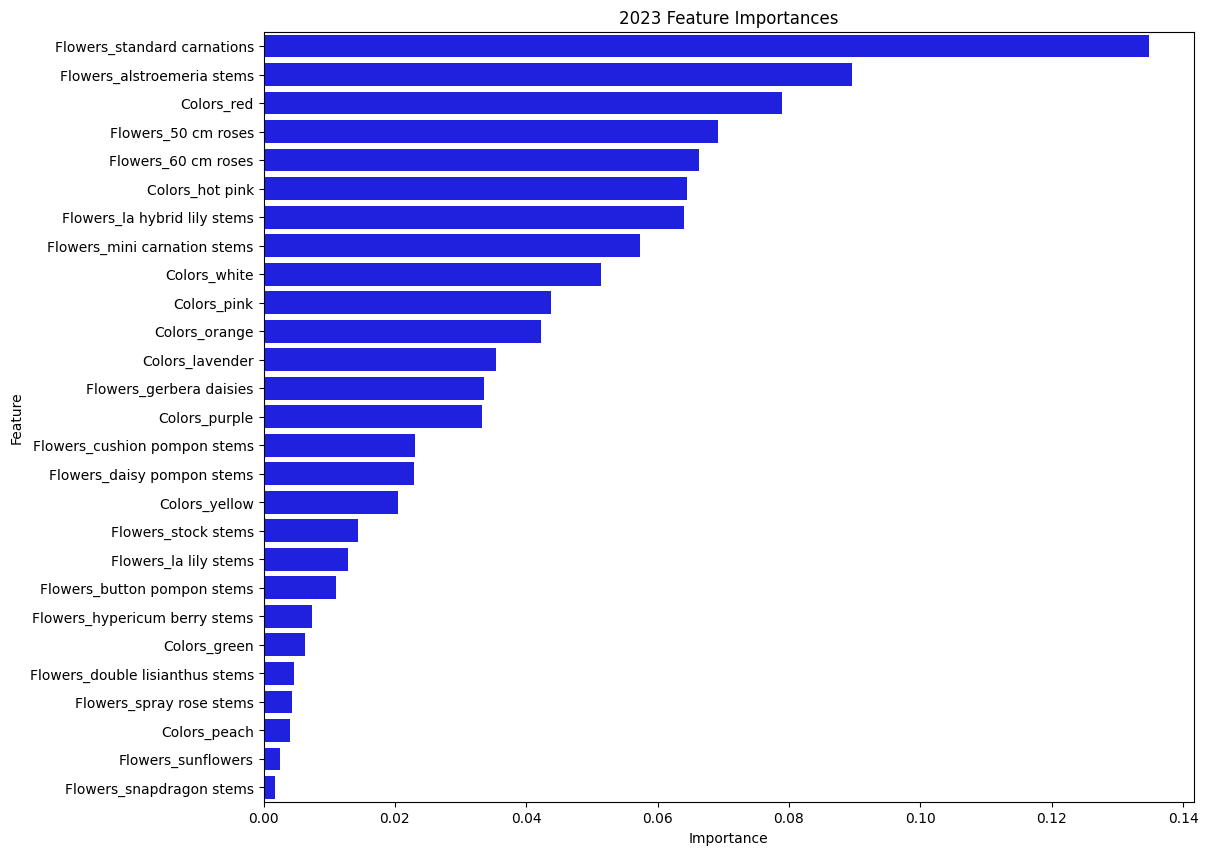

In [48]:
# You may want to replace 'top_10' with a more descriptive variable name, like 'top_10_2023'.
top_10_2023 = df_merged_2023[['Colors', 'Flowers', 'Gross Order Line Group Amt']]

# One-hot encode the categorical features
encoder_2023 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_2023 = encoder_2023.fit_transform(top_10_2023[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df_2023 = pd.DataFrame(encoded_data_2023, columns=encoder_2023.get_feature_names_out())

# Concatenate the encoded data with the original DataFrame
top_10_encoded_2023 = pd.concat([top_10_2023.drop(['Colors', 'Flowers'], axis=1).reset_index(drop=True), encoded_df_2023], axis=1)

# Separate target variable and features
y_2023 = top_10_encoded_2023['Gross Order Line Group Amt']
X_2023 = top_10_encoded_2023.drop(['Gross Order Line Group Amt'], axis=1)

X_2023.columns = X_2023.columns.astype(str)

# Impute missing values with the median
imputer_2023 = SimpleImputer(strategy='median')
X_imputed_2023 = imputer_2023.fit_transform(X_2023)

# Create a DataFrame from the imputed data
X_imputed_df_2023 = pd.DataFrame(X_imputed_2023, columns=X_2023.columns)

# Fill NaN values in the target with the median
y_2023 = y_2023.fillna(y_2023.median())

# Fit a Random Forest model
model_2023 = RandomForestRegressor(random_state=0)
model_2023.fit(X_imputed_df_2023, y_2023)

# Get feature importances
importances_2023 = model_2023.feature_importances_

# Create a DataFrame for the importances
importances_df_2023 = pd.DataFrame({
    'Feature': X_2023.columns,
    'Importance': importances_2023
})

# Sort the DataFrame by importance
importances_df_2023 = importances_df_2023.sort_values(by='Importance', ascending=False)

# Create a bar plot for the feature importances
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df_2023, color='b')
plt.title('2023 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Extended Feature Importances by Flowers and Colors 2023')
plt.show()


In [49]:
# Select only the columns corresponding to 'Flowers' and 'Colors'
X = top_10_encoded.filter(regex='Flowers|Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Create a DataFrame from the imputed data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sum the importances of the binary columns corresponding to each unique flower and color
flower_importances = importances_df[importances_df['Feature'].str.startswith('Flowers')].sum()
color_importances = importances_df[importances_df['Feature'].str.startswith('Colors')].sum()

print("Importance of Flowers: ", flower_importances)
print("Importance of Colors: ", color_importances)


Importance of Flowers:  Feature       Flowers_50 cm rosesFlowers_60 cm rosesFlowers_...
Importance                                             0.774475
dtype: object
Importance of Colors:  Feature       Colors_greenColors_hot pinkColors_lavenderColo...
Importance                                             0.225525
dtype: object


                            Feature  Importance
1               Flowers_60 cm roses    0.338269
4      Flowers_cushion pompon stems    0.161600
5        Flowers_daisy pompon stems    0.121315
13     Flowers_mini carnation stems    0.088589
11     Flowers_la hybrid lily stems    0.057986
16      Flowers_standard carnations    0.044919
0               Flowers_50 cm roses    0.038382
2        Flowers_alstroemeria stems    0.025571
17              Flowers_stock stems    0.024067
14         Flowers_snapdragon stems    0.012609
6   Flowers_double lisianthus stems    0.012108
10    Flowers_hypericum berry stems    0.011259
15         Flowers_spray rose stems    0.009720
12            Flowers_la lily stems    0.009329
8           Flowers_gerbera daisies    0.009153
18               Flowers_sunflowers    0.009083
3       Flowers_button pompon stems    0.008968
19          Flowers_waxflower stems    0.008094
7                 Flowers_fuji mums    0.005724
9          Flowers_hydrangea blooms    0

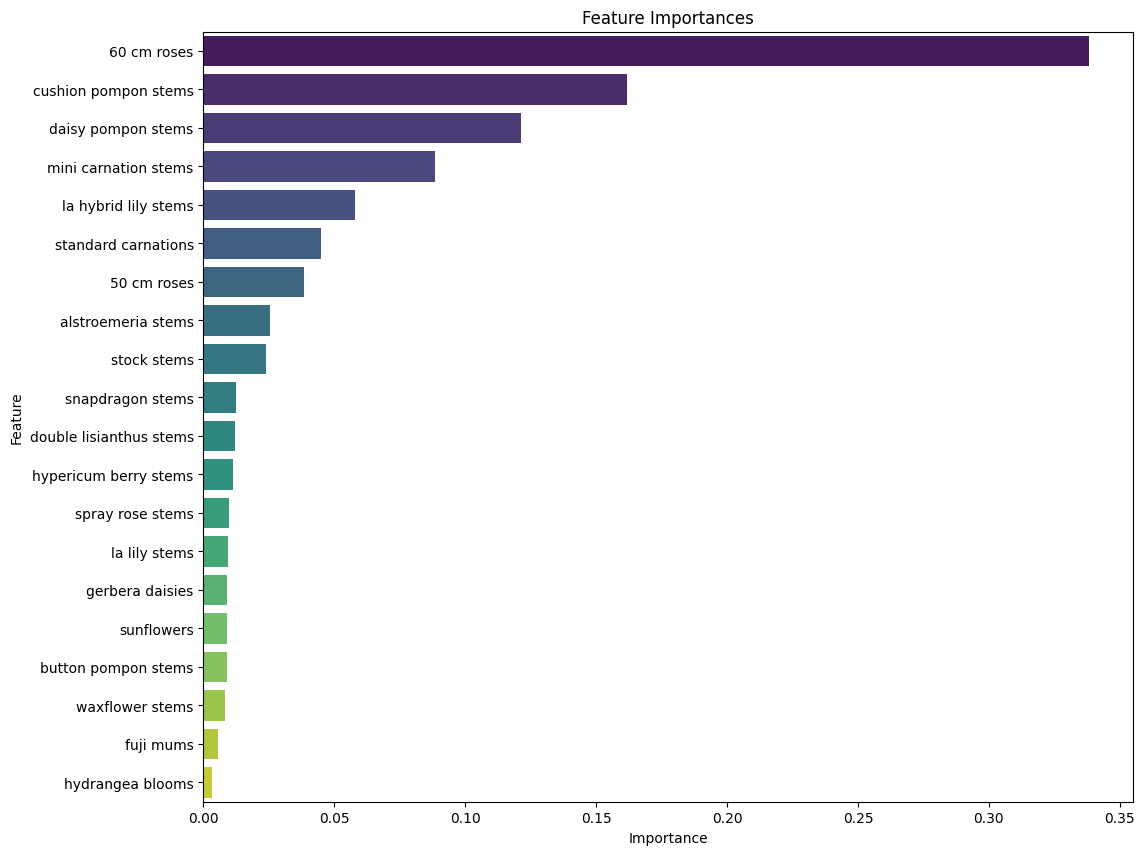

In [50]:
# Select only the columns corresponding to 'Flowers'
X_flowers = top_10_encoded.filter(regex='Flowers')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_flowers_imputed = imputer.fit_transform(X_flowers)

# Create a DataFrame from the imputed data
X_flowers_imputed_df = pd.DataFrame(X_flowers_imputed, columns=X_flowers.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_flowers_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X_flowers.columns,
    'Importance': importances
})

# Print the importances of each unique flower
print(importances_df.sort_values(by='Importance', ascending=False))
# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
# Remove 'Flowers_' prefix from feature names
importances_df_sorted['Feature'] = importances_df_sorted['Feature'].str.replace('Flowers_', '')

# Plot the feature importances
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature Importances by Flowers')
plt.show()


                            Feature  Importance
1               Flowers_60 cm roses    0.276302
4      Flowers_cushion pompon stems    0.193619
5        Flowers_daisy pompon stems    0.134511
11     Flowers_la hybrid lily stems    0.133583
13     Flowers_mini carnation stems    0.128909
0               Flowers_50 cm roses    0.042725
16      Flowers_standard carnations    0.024735
2        Flowers_alstroemeria stems    0.011520
15         Flowers_spray rose stems    0.010154
17              Flowers_stock stems    0.010028
8           Flowers_gerbera daisies    0.009533
10    Flowers_hypericum berry stems    0.007940
7                 Flowers_fuji mums    0.002723
3       Flowers_button pompon stems    0.002651
19          Flowers_waxflower stems    0.002617
9          Flowers_hydrangea blooms    0.002077
14         Flowers_snapdragon stems    0.001936
18               Flowers_sunflowers    0.001854
12            Flowers_la lily stems    0.001661
6   Flowers_double lisianthus stems    0

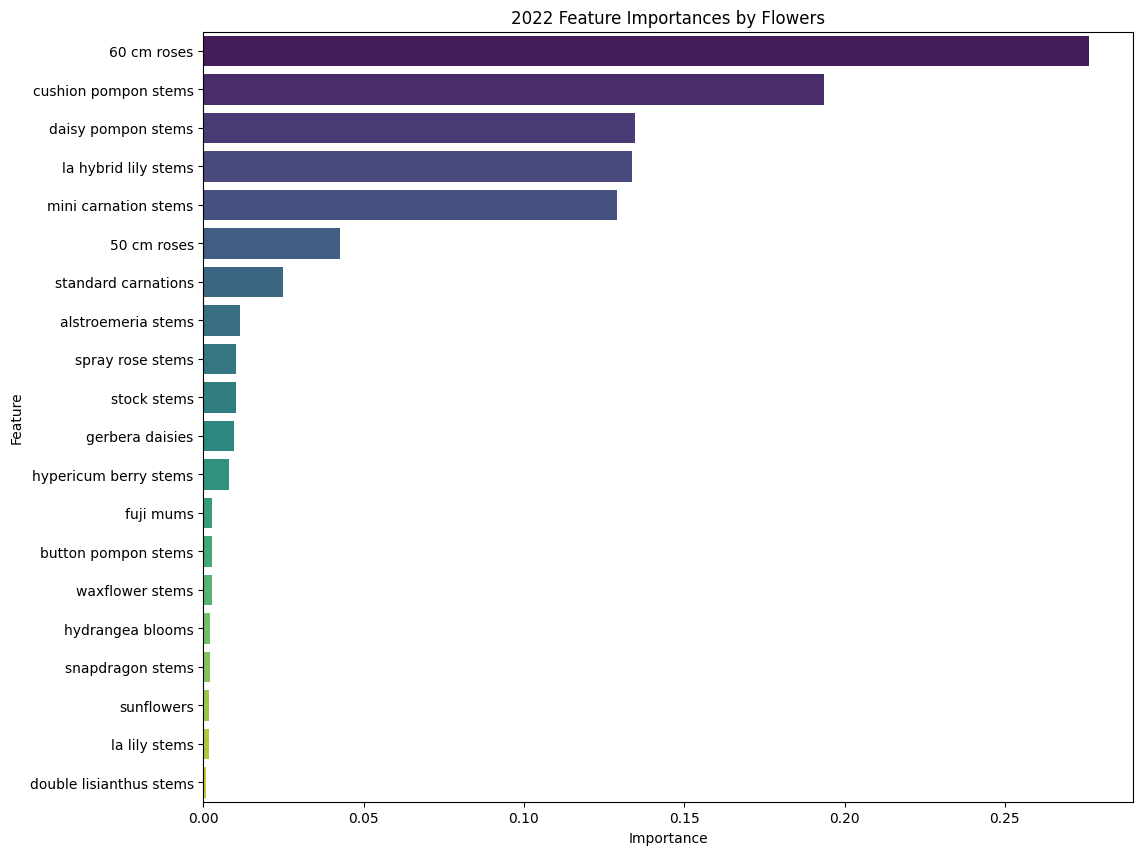

In [51]:
# Select only the columns corresponding to 'Flowers'
X_flowers_2022 = top_10_encoded_2022.filter(regex='Flowers')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_flowers_imputed_2022 = imputer.fit_transform(X_flowers_2022)

# Create a DataFrame from the imputed data
X_flowers_imputed_df_2022 = pd.DataFrame(X_flowers_imputed_2022, columns=X_flowers_2022.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_flowers_imputed_df_2022, y_2022)

# Get feature importances
importances_2022 = model.feature_importances_

# Create a DataFrame for the importances
importances_df_2022 = pd.DataFrame({
    'Feature': X_flowers_2022.columns,
    'Importance': importances_2022
})

# Print the importances of each unique flower
print(importances_df_2022.sort_values(by='Importance', ascending=False))

# Sort the DataFrame by importance
importances_df_sorted_2022 = importances_df_2022.sort_values(by='Importance', ascending=False)

# Remove 'Flowers_' prefix from feature names
importances_df_sorted_2022['Feature'] = importances_df_sorted_2022['Feature'].str.replace('Flowers_', '')

# Plot the feature importances
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted_2022, palette='viridis')
plt.title('2022 Feature Importances by Flowers')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('2022 Feature Importances by Flowers')
plt.show()


                            Feature  Importance
14      Flowers_standard carnations    0.205413
2        Flowers_alstroemeria stems    0.144069
1               Flowers_60 cm roses    0.105338
9      Flowers_la hybrid lily stems    0.085649
0               Flowers_50 cm roses    0.081639
4      Flowers_cushion pompon stems    0.080526
11     Flowers_mini carnation stems    0.074966
5        Flowers_daisy pompon stems    0.062274
15              Flowers_stock stems    0.047238
7           Flowers_gerbera daisies    0.027050
3       Flowers_button pompon stems    0.014546
16               Flowers_sunflowers    0.013884
8     Flowers_hypericum berry stems    0.013309
10            Flowers_la lily stems    0.012880
13         Flowers_spray rose stems    0.010758
12         Flowers_snapdragon stems    0.010284
6   Flowers_double lisianthus stems    0.010179


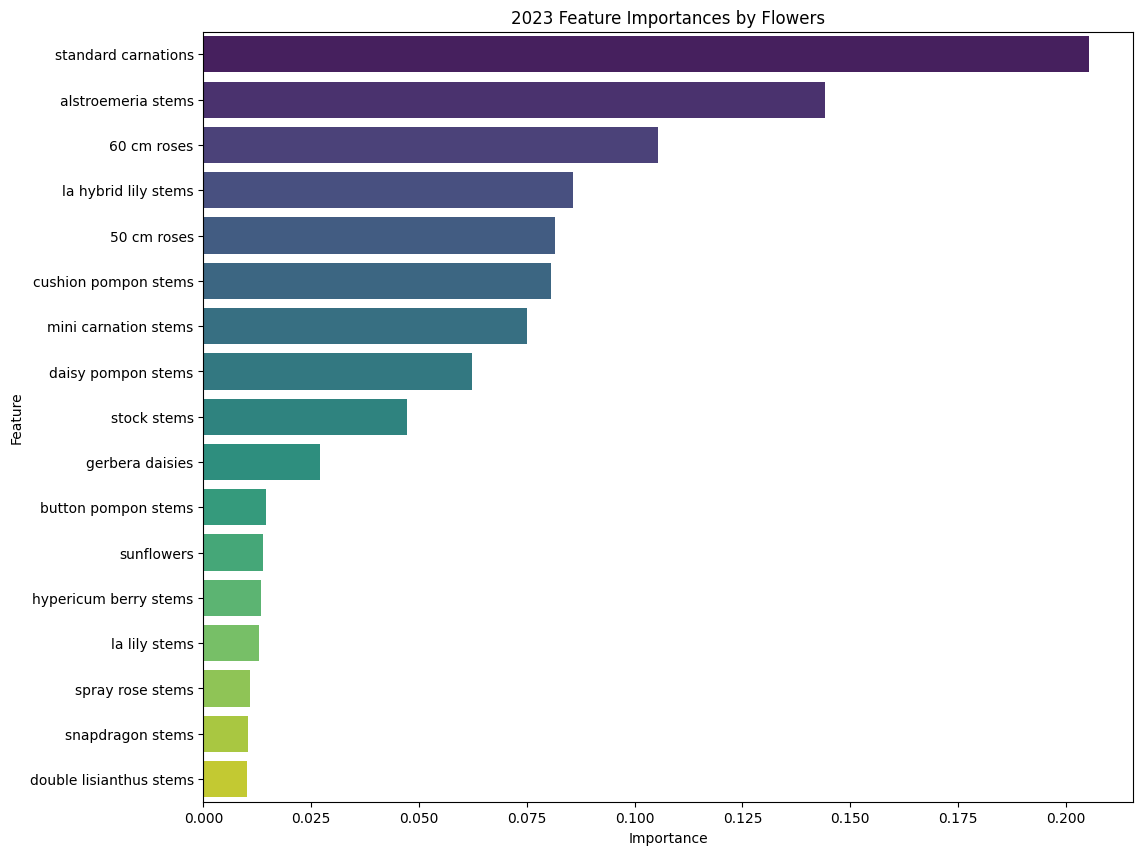

In [52]:
# Select only the columns corresponding to 'Flowers'
X_flowers_2023 = top_10_encoded_2023.filter(regex='Flowers')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_flowers_imputed_2023 = imputer.fit_transform(X_flowers_2023)

# Create a DataFrame from the imputed data
X_flowers_imputed_df_2023 = pd.DataFrame(X_flowers_imputed_2023, columns=X_flowers_2023.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_flowers_imputed_df_2023, y_2023)

# Get feature importances
importances_2023 = model.feature_importances_

# Create a DataFrame for the importances
importances_df_2023 = pd.DataFrame({
    'Feature': X_flowers_2023.columns,
    'Importance': importances_2023
})

# Print the importances of each unique flower
print(importances_df_2023.sort_values(by='Importance', ascending=False))

# Sort the DataFrame by importance
importances_df_sorted_2023 = importances_df_2023.sort_values(by='Importance', ascending=False)

# Remove 'Flowers_' prefix from feature names
importances_df_sorted_2023['Feature'] = importances_df_sorted_2023['Feature'].str.replace('Flowers_', '')

# Plot the feature importances
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted_2023, palette='viridis')
plt.title('2023 Feature Importances by Flowers')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('2023 Feature Importances by Flowers')
plt.show()


           Feature  Importance
2  Colors_lavender    0.219674
3    Colors_orange    0.156180
7       Colors_red    0.123949
9    Colors_yellow    0.117099
6    Colors_purple    0.093104
0     Colors_green    0.081693
1  Colors_hot pink    0.081311
8     Colors_white    0.060326
5      Colors_pink    0.057504
4     Colors_peach    0.009160


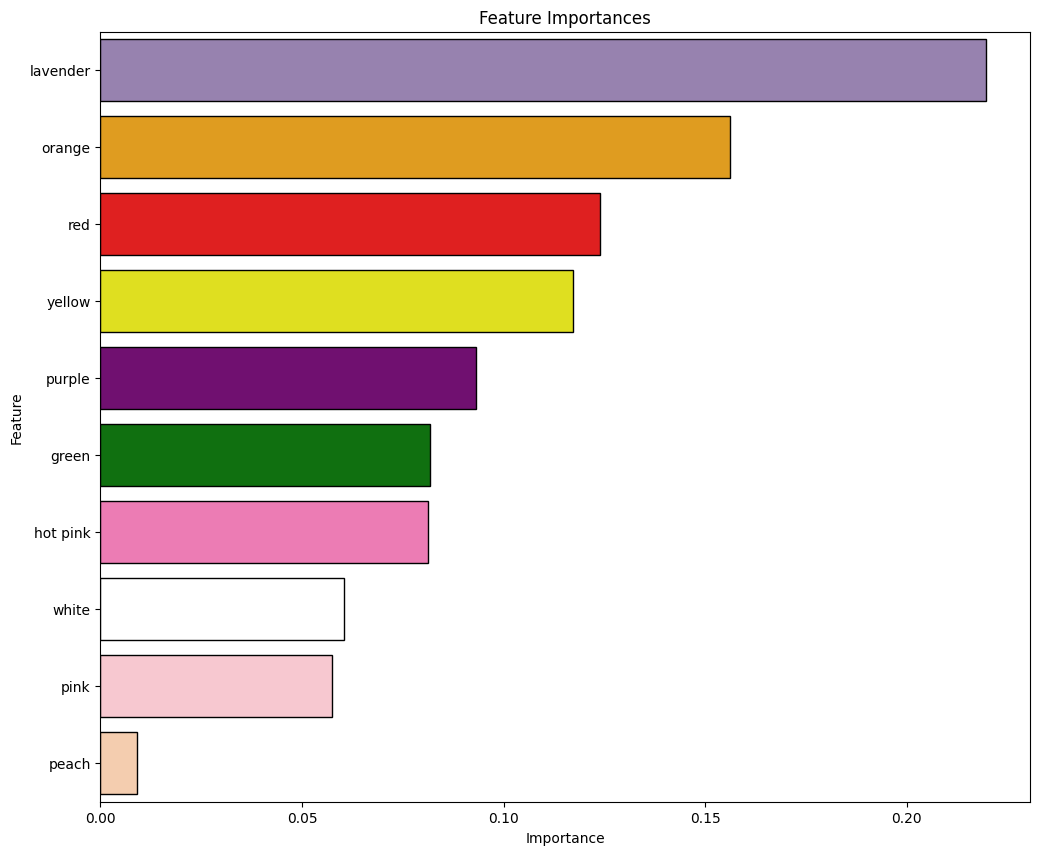

In [53]:
# Select only the columns corresponding to 'Colors'
X_colors = top_10_encoded.filter(regex='Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_colors_imputed = imputer.fit_transform(X_colors)

# Create a DataFrame from the imputed data
X_colors_imputed_df = pd.DataFrame(X_colors_imputed, columns=X_colors.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_colors_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X_colors.columns,
    'Importance': importances
})

# Print the importances of each unique color
print(importances_df.sort_values(by='Importance', ascending=False))
# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
# Remove 'Colors_' prefix from feature names
importances_df_sorted['Feature'] = importances_df_sorted['Feature'].str.replace('Colors_', '')

# Create a list of colors for the barplot
colors = [custom_colors.get(feature, 'gray') for feature in importances_df_sorted['Feature']]

# Create the barplot
plt.figure(figsize=(12,10))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette=colors, edgecolor='black')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature Importances by Colors')
plt.show()


           Feature  Importance
2  Colors_lavender    0.259731
3    Colors_orange    0.208638
7       Colors_red    0.144456
6    Colors_purple    0.110514
5      Colors_pink    0.078030
1  Colors_hot pink    0.071863
8    Colors_yellow    0.068375
0     Colors_green    0.049497
4     Colors_peach    0.008896


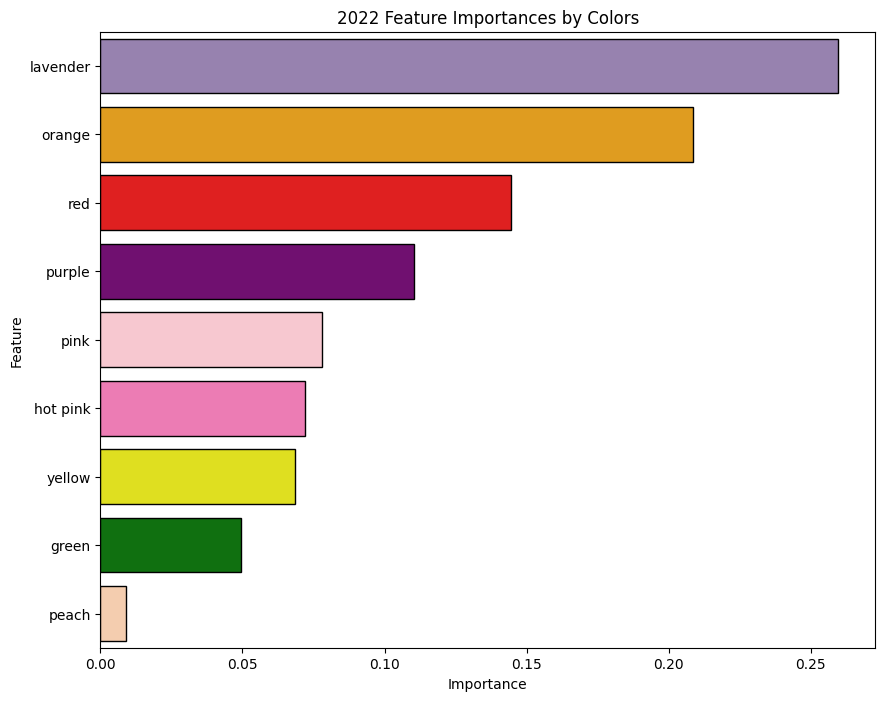

In [54]:
# Select only the columns corresponding to 'Colors'
X_colors_2022 = top_10_encoded_2022.filter(regex='Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_colors_imputed_2022 = imputer.fit_transform(X_colors_2022)

# Create a DataFrame from the imputed data
X_colors_imputed_df_2022 = pd.DataFrame(X_colors_imputed_2022, columns=X_colors_2022.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_colors_imputed_df_2022, y_2022)

# Get feature importances
importances_2022 = model.feature_importances_

# Create a DataFrame for the importances
importances_df_2022 = pd.DataFrame({
    'Feature': X_colors_2022.columns,
    'Importance': importances_2022
})

# Print the importances of each unique color
print(importances_df_2022.sort_values(by='Importance', ascending=False))

# Sort the DataFrame by importance
importances_df_sorted_2022 = importances_df_2022.sort_values(by='Importance', ascending=False)

# Remove 'Colors_' prefix from feature names
importances_df_sorted_2022['Feature'] = importances_df_sorted_2022['Feature'].str.replace('Colors_', '')

# Create a list of colors for the barplot
colors = [custom_colors.get(feature, 'gray') for feature in importances_df_sorted_2022['Feature']]

# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted_2022, palette=colors, edgecolor='black')
plt.title('2022 Feature Importances by Colors')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('2022 Feature Importances by Colors')
plt.show()


           Feature  Importance
8     Colors_white    0.147463
5      Colors_pink    0.138014
2  Colors_lavender    0.131777
7       Colors_red    0.130036
9    Colors_yellow    0.114140
6    Colors_purple    0.112106
1  Colors_hot pink    0.090667
3    Colors_orange    0.070065
0     Colors_green    0.054154
4     Colors_peach    0.011578


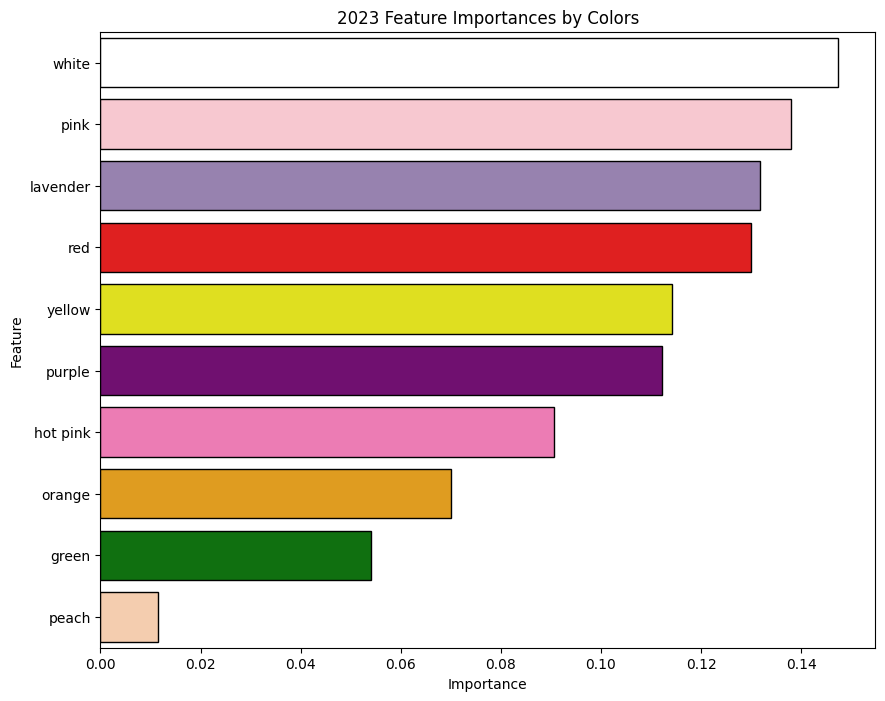

In [55]:
# Select only the columns corresponding to 'Colors'
X_colors_2023 = top_10_encoded_2023.filter(regex='Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_colors_imputed_2023 = imputer.fit_transform(X_colors_2023)

# Create a DataFrame from the imputed data
X_colors_imputed_df_2023 = pd.DataFrame(X_colors_imputed_2023, columns=X_colors_2023.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_colors_imputed_df_2023, y_2023)

# Get feature importances
importances_2023 = model.feature_importances_

# Create a DataFrame for the importances
importances_df_2023 = pd.DataFrame({
    'Feature': X_colors_2023.columns,
    'Importance': importances_2023
})

# Print the importances of each unique color
print(importances_df_2023.sort_values(by='Importance', ascending=False))

# Sort the DataFrame by importance
importances_df_sorted_2023 = importances_df_2023.sort_values(by='Importance', ascending=False)

# Remove 'Colors_' prefix from feature names
importances_df_sorted_2023['Feature'] = importances_df_sorted_2023['Feature'].str.replace('Colors_', '')

# Create a list of colors for the barplot
colors = [custom_colors.get(feature, 'gray') for feature in importances_df_sorted_2023['Feature']]

# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted_2023, palette=colors, edgecolor='black')
plt.title('2023 Feature Importances by Colors')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('2023 Feature Importances by Colors')
plt.show()

In [56]:
# Create a DataFrame with unique flowers and colors for each arrangement
df_merged_unique = df_merged.groupby('Arrangement').agg({'Flowers': 'nunique', 'Colors': 'nunique'}).reset_index()

# Encode the categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_merged_unique[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Colors', 'Flowers']))

# Concatenate the encoded data with the original DataFrame
all_arrangements_encoded = pd.concat([df_merged_unique.drop(['Colors', 'Flowers'], axis=1), encoded_df], axis=1)
# Drop the 'Arrangement' column
all_arrangements_encoded = all_arrangements_encoded.drop('Arrangement', axis=1)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(all_arrangements_encoded)

# Create a DataFrame from the imputed data
all_arrangements_imputed = pd.DataFrame(imputed_data, columns=all_arrangements_encoded.columns)

# Create a new target variable that only contains the GOLGA for the arrangements in 'all_arrangements_imputed'
y = df_merged.loc[all_arrangements_imputed.index, 'Gross Order Line Group Amt']

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(all_arrangements_imputed, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame of feature importances
importances_df = pd.DataFrame({'Feature': all_arrangements_imputed.columns, 'Importance': importances})

# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importances_df_sorted)


      Feature  Importance
6   Flowers_2    0.158315
9   Flowers_5    0.111342
0    Colors_1    0.105134
5   Flowers_1    0.101157
8   Flowers_4    0.094212
11  Flowers_7    0.088393
10  Flowers_6    0.088329
4    Colors_5    0.078426
2    Colors_3    0.066036
7   Flowers_3    0.062484
3    Colors_4    0.036578
1    Colors_2    0.009595


In [57]:
# Print categories for 'Colors'
print("Colors categories:")
for i, category in enumerate(encoder.categories_[0]):
    print(f"Colors_{i+1}: {category}")

# Print categories for 'Flowers'
print("\nFlowers categories:")
for i, category in enumerate(encoder.categories_[1]):
    print(f"Flowers_{i+1}: {category}")


Colors categories:
Colors_1: 1
Colors_2: 2
Colors_3: 3
Colors_4: 4
Colors_5: 5

Flowers categories:
Flowers_1: 1
Flowers_2: 2
Flowers_3: 3
Flowers_4: 4
Flowers_5: 5
Flowers_6: 6
Flowers_7: 7


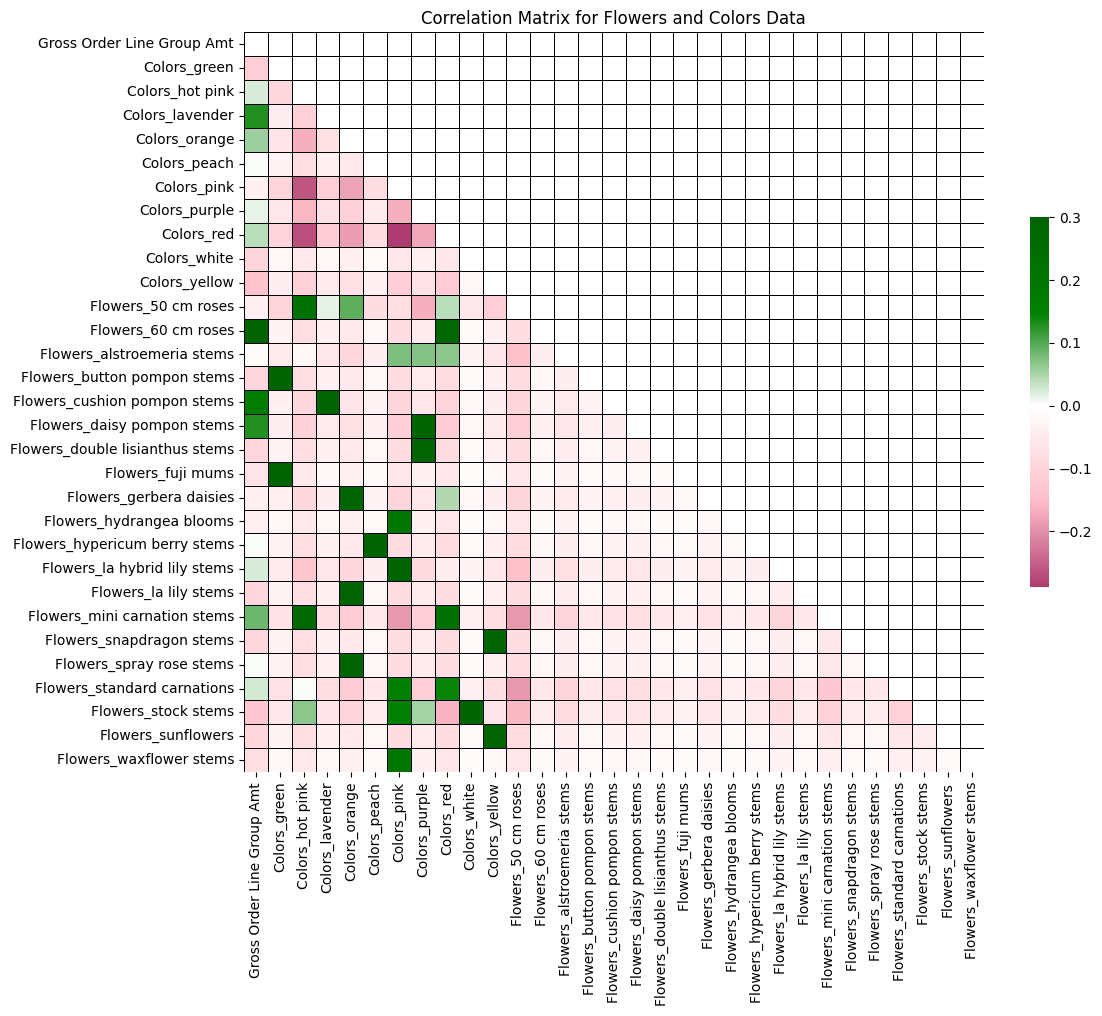

                                 Gross Order Line Group Amt  Colors_green  \
Gross Order Line Group Amt                         1.000000     -0.118161   
Colors_green                                      -0.118161      1.000000   
Colors_hot pink                                    0.023921     -0.093131   
Colors_lavender                                    0.128710     -0.041487   
Colors_orange                                      0.058371     -0.064194   
Colors_peach                                       0.004249     -0.028989   
Colors_pink                                       -0.035829     -0.099895   
Colors_purple                                      0.014582     -0.060138   
Colors_red                                         0.040511     -0.103252   
Colors_white                                      -0.099917     -0.020378   
Colors_yellow                                     -0.138944     -0.041487   
Flowers_50 cm roses                               -0.039935     -0.099895   

In [58]:

# Calculate the correlation matrix
corr_top_10_encoded = top_10_encoded.corr()

# Generate a mask for the upper triangle of the correlation matrix
mask_top_10_encoded = np.triu(np.ones_like(corr_top_10_encoded, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Draw the heatmap with the custom colormap for the top_10_encoded data
sns.heatmap(corr_top_10_encoded, mask=mask_top_10_encoded, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('Correlation Matrix for Flowers and Colors Data')

plt.tight_layout()
plt.savefig('Correlation Matrix top_10_encoded')
plt.show()
print(corr_top_10_encoded)

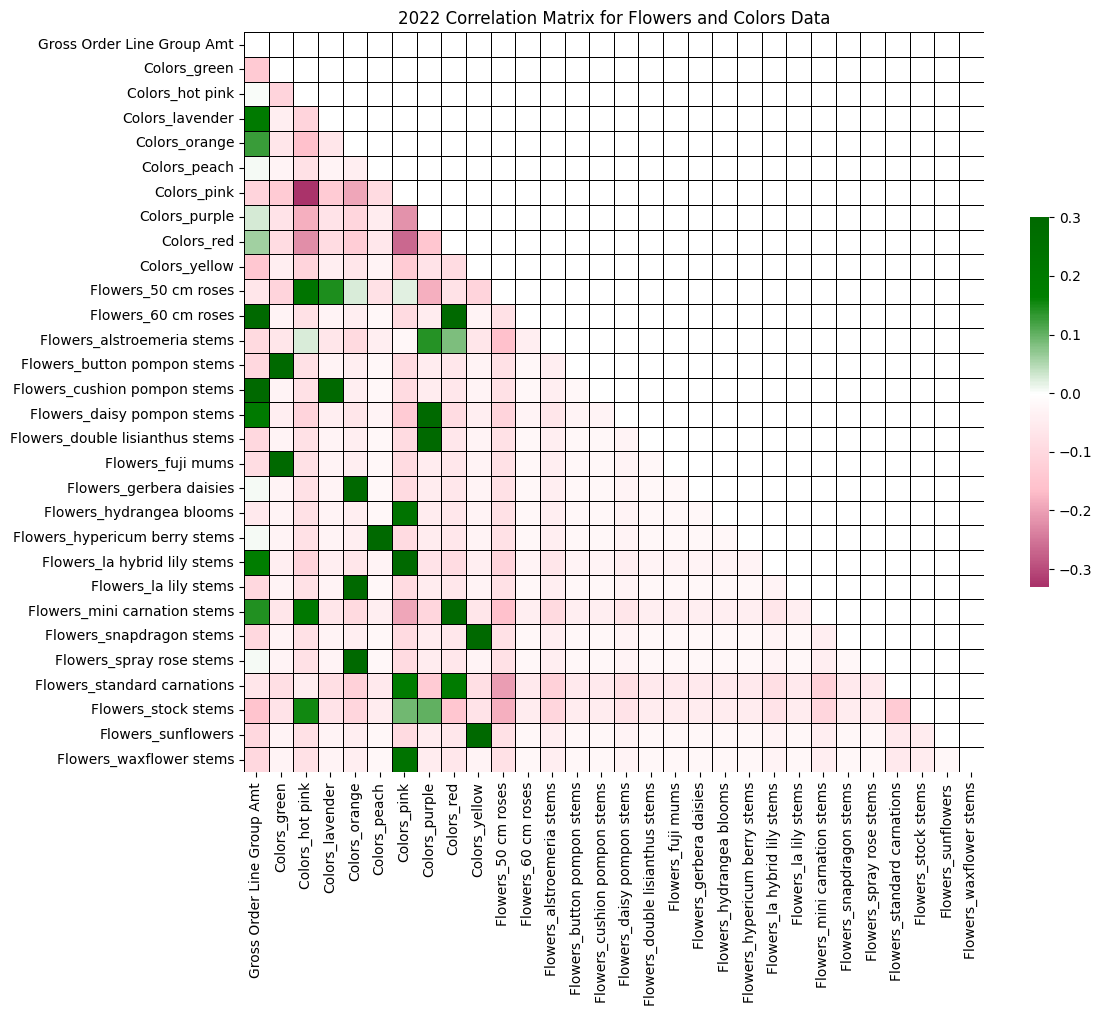

                                 Gross Order Line Group Amt  Colors_green  \
Gross Order Line Group Amt                         1.000000     -0.136354   
Colors_green                                      -0.136354      1.000000   
Colors_hot pink                                    0.002255     -0.112367   
Colors_lavender                                    0.198954     -0.045455   
Colors_orange                                      0.126396     -0.065795   
Colors_peach                                       0.004491     -0.031782   
Colors_pink                                       -0.111948     -0.133815   
Colors_purple                                      0.027603     -0.074453   
Colors_red                                         0.059934     -0.090324   
Colors_yellow                                     -0.145530     -0.045455   
Flowers_50 cm roses                               -0.066799     -0.112367   
Flowers_60 cm roses                                0.455853     -0.031782   

In [59]:
# Calculate the correlation matrix
corr_top_10_encoded_2022 = top_10_encoded_2022.corr()

# Generate a mask for the upper triangle of the correlation matrix
mask_top_10_encoded_2022 = np.triu(np.ones_like(corr_top_10_encoded_2022, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Draw the heatmap with the custom colormap for the top_10_encoded_2022 data
sns.heatmap(corr_top_10_encoded_2022, mask=mask_top_10_encoded_2022, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('2022 Correlation Matrix for Flowers and Colors Data')

plt.tight_layout()
plt.savefig('2022 Correlation Matrix top_10_encoded')
plt.show()
print(corr_top_10_encoded_2022)

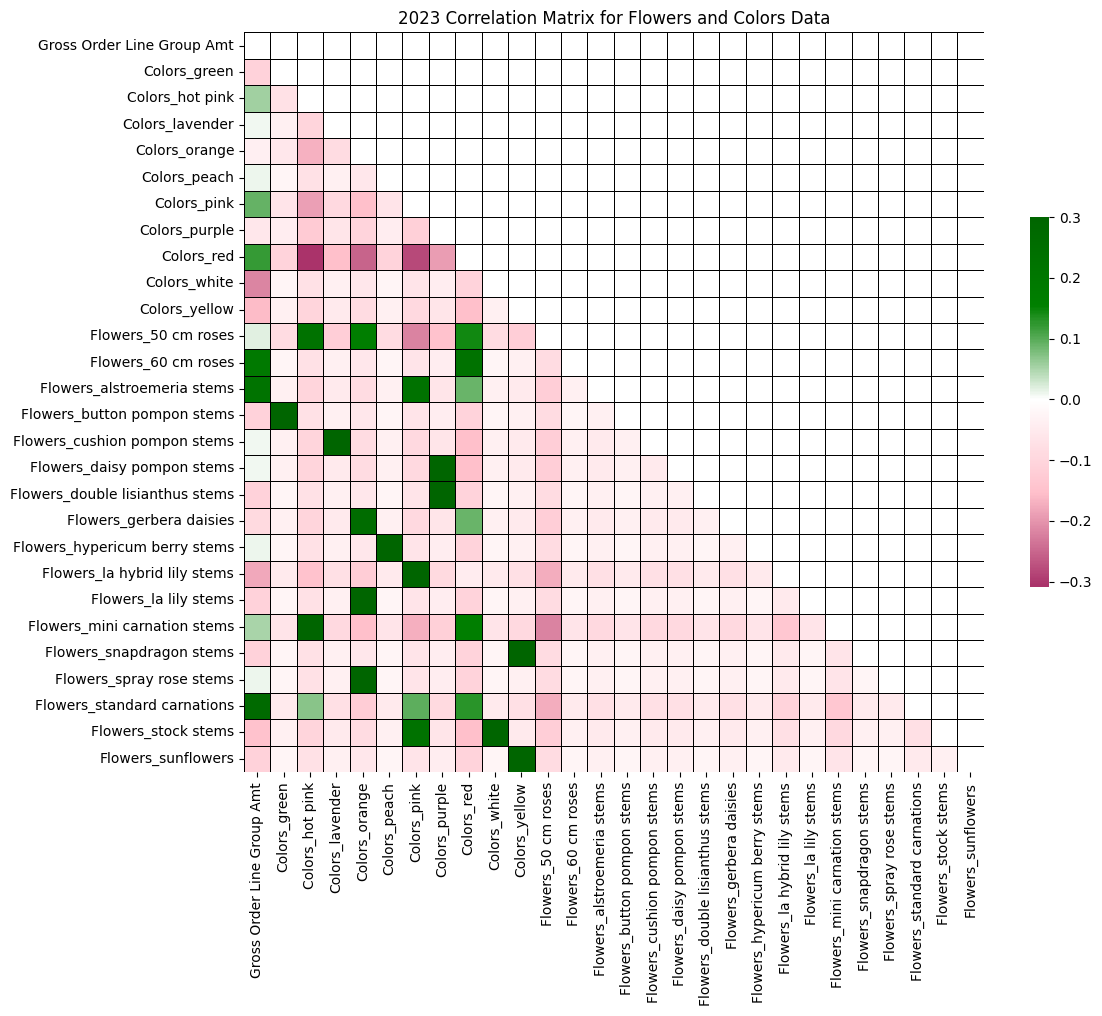

                                 Gross Order Line Group Amt  Colors_green  \
Gross Order Line Group Amt                         1.000000     -0.111028   
Colors_green                                      -0.111028      1.000000   
Colors_hot pink                                    0.055042     -0.071743   
Colors_lavender                                    0.007958     -0.035806   
Colors_orange                                     -0.037934     -0.058926   
Colors_peach                                       0.009723     -0.025000   
Colors_pink                                        0.092955     -0.065465   
Colors_purple                                     -0.059185     -0.044426   
Colors_red                                         0.120417     -0.107736   
Colors_white                                      -0.217864     -0.025000   
Colors_yellow                                     -0.159018     -0.035806   
Flowers_50 cm roses                                0.017534     -0.083853   

In [60]:
# Calculate the correlation matrix
corr_top_10_encoded_2023 = top_10_encoded_2023.corr()

# Generate a mask for the upper triangle of the correlation matrix
mask_top_10_encoded_2023 = np.triu(np.ones_like(corr_top_10_encoded_2023, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Draw the heatmap with the custom colormap for the top_10_encoded_2023 data
sns.heatmap(corr_top_10_encoded_2023, mask=mask_top_10_encoded_2023, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')
plt.title('2023 Correlation Matrix for Flowers and Colors Data')

plt.tight_layout()
plt.savefig('2023 Correlation Matrix top_10_encoded')
plt.show()
print(corr_top_10_encoded_2023)

In [61]:
import os
import nbformat
from nbconvert import PDFExporter, HTMLExporter, LatexExporter, MarkdownExporter, RSTExporter

# Read the Jupyter Notebook file
with open('FTD_VDay.ipynb', 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Configure the exporters
pdf_exporter = PDFExporter()
pdf_exporter.exclude_input_prompt = True
pdf_exporter.exclude_output_prompt = True

html_exporter = HTMLExporter()
latex_exporter = LatexExporter()
markdown_exporter = MarkdownExporter()
rst_exporter = RSTExporter()

# Export the notebook to PDF
pdf_output, _ = pdf_exporter.from_notebook_node(nb)

# Export the notebook to HTML
html_output, _ = html_exporter.from_notebook_node(nb)

# Export the notebook to LaTeX
latex_output, _ = latex_exporter.from_notebook_node(nb)

# Export the notebook to Markdown
markdown_output, _ = markdown_exporter.from_notebook_node(nb)

# Export the notebook to reStructuredText
rst_output, _ = rst_exporter.from_notebook_node(nb)

# Create the necessary subfolders
os.makedirs('WriteUp/Latex', exist_ok=True)
os.makedirs('WriteUp/Markdown', exist_ok=True)
os.makedirs('WriteUp/RST', exist_ok=True)

# Save the outputs to files
with open('WriteUp/FTD_VDay.pdf', 'wb') as f:
    f.write(pdf_output)

with open('WriteUp/FTD_VDay.html', 'w', encoding='utf-8') as f:
    f.write(html_output)

with open('WriteUp/Latex/FTD_VDay.tex', 'w', encoding='utf-8') as f:
    f.write(latex_output)

with open('WriteUp/Markdown/FTD_VDay.md', 'w', encoding='utf-8') as f:
    f.write(markdown_output)

with open('WriteUp/RST/FTD_VDay.rst', 'w', encoding='utf-8') as f:
    f.write(rst_output)
